In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
random_state = 123*987*4-1
models_to_average = 50

In [3]:
real_data = pd.read_csv("./datasets/real_ds_shorthouses.csv")
synt_data_distilgpt2 = pd.read_csv('./datasets/synt_ds_distillgpt2_shorthouses_3epochs_temp0.7.csv')
synt_data_gpt2xl = pd.read_csv("./datasets/synt_ds_gpt2xl_shorthouses_3epochs_temp0.7.csv")
synt_data_cerebras = pd.read_csv("./datasets/synt_ds_cerebras13_shorthouses_3epochs_temp0.7.csv")
synt_data_phi = pd.read_csv("./datasets/synt_ds_phi15_shorthouses_3epochs_temp0.7.csv")
control_dataset = pd.read_csv("./datasets/real_ds_shorthouses_control.csv")

In [4]:
real_data.drop(columns="Unnamed: 0",inplace=True)
synt_data_distilgpt2.drop(columns="Unnamed: 0",inplace=True)
synt_data_gpt2xl.drop(columns="Unnamed: 0",inplace=True)
synt_data_cerebras.drop(columns="Unnamed: 0",inplace=True)
synt_data_phi.drop(columns="Unnamed: 0",inplace=True)
control_dataset.drop(columns="Unnamed: 0",inplace=True) 


# Data analysis

In [5]:
real_data.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16640.000000  16640.000000  16640.000000  16640.000000  16640.000000   
mean       3.868659     28.579147      5.420879      1.095926   1429.048137   
std        1.890039     12.582832      2.509716      0.476001   1131.440157   
min        0.499900      1.000000      0.888889      0.333333      3.000000   
25%        2.556800     18.000000      4.434536      1.005894    792.000000   
50%        3.537750     29.000000      5.226145      1.048756   1168.000000   
75%        4.762850     37.000000      6.050922      1.099480   1724.250000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  16640.000000  16640.000000  16640.000000  16640.000000  
mean       3.068690     35.637668   -119.575062      2.064754  
std       10.881187      2.135661      2.002243      1.149140  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.427894     33.940000   -121.800000      1.194750  
50%        2.818506     34.260000   -118.500000      1.802500  
75%        3.286007     37.720000   -118.010000      2.641000  
max     1243.333333     41.950000   -114.310000      5.000010

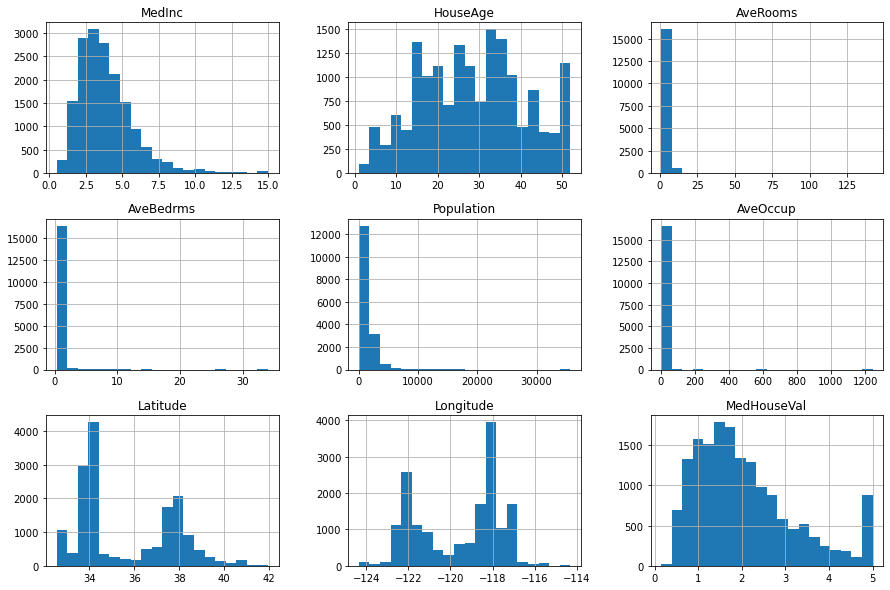

In [6]:
real_data.hist(bins=20, grid=True, figsize=(15, 10), layout=(3, 3))
plt.show()

In [7]:
synt_data_distilgpt2.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16640.000000  16640.000000  16640.000000  16640.000000  1.664000e+04   
mean       3.495229     29.383901      5.123393      1.047178  4.378434e+10   
std        1.352780     12.189593      1.064928      0.125353  5.648010e+12   
min        0.466800      2.000000      0.895715      0.006725  1.000000e+00   
25%        2.600000     19.000000      4.483824      1.000000  8.170000e+02   
50%        3.294400     29.000000      5.032864      1.043427  1.082000e+03   
75%        4.232700     37.000000      5.824032      1.077402  1.463000e+03   
max       16.898000     52.000000     20.677427      7.018079  7.285714e+14   

           AveOccup      Latitude      Longitude   MedHouseVal  
count  16640.000000  16640.000000   16640.000000  16640.000000  
mean       2.956318     35.322059    -126.826671      2.063434  
std        0.629474      3.952969     945.826021      1.146298  
min        0.931397   -122.100000 -122127.000000      0.149990  
25%        2.600000     33.940000    -121.840000      1.206000  
50%        2.867569     34.120000    -118.350000      1.805000  
75%        3.242829     37.710000    -118.020000      2.644000  
max        8.020724     52.900000       6.100000      5.000010

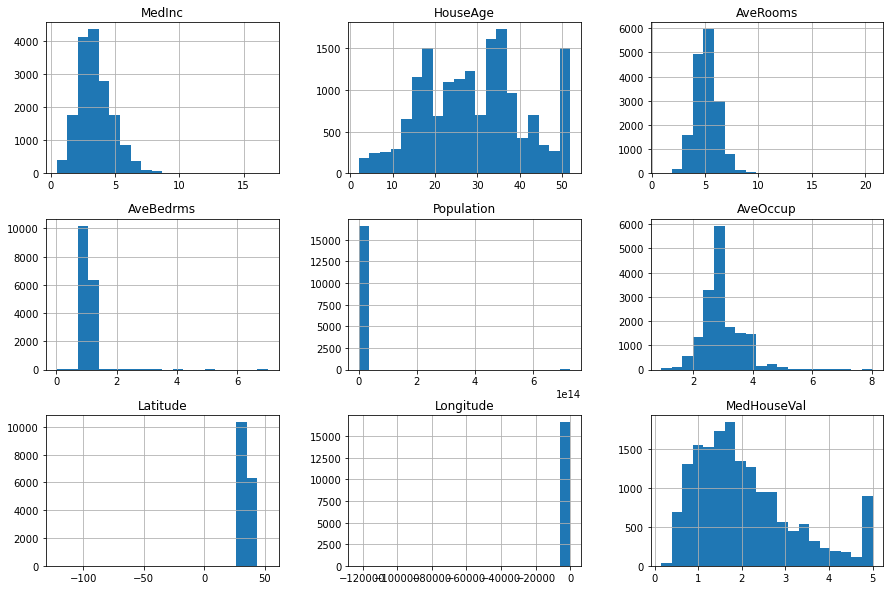

In [8]:
synt_data_distilgpt2.hist(bins=20, grid=True, figsize=(15, 10), layout=(3, 3))
plt.show()

In [9]:
synt_data_gpt2xl.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16640.000000  16640.000000  16640.000000  16640.000000  16640.000000   
mean       3.899166     30.855228      5.293687      1.045442   1217.895547   
std        1.739268     12.238957      1.043695      0.084533    614.800255   
min        0.726600      2.000000      1.722222      0.600000      0.900000   
25%        2.708300     21.000000      4.664328      1.002448    811.000000   
50%        3.638900     32.000000      5.170037      1.044726   1064.500000   
75%        4.722200     38.000000      5.907801      1.077551   1478.000000   
max       20.000000     52.000000     14.898106      5.498534  10136.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  16640.000000  16640.000000  16640.000000  16640.000000  
mean       2.910235     35.470028   -119.479501      2.068325  
std        0.570505      2.009556      1.924312      1.155015  
min        1.400000     30.740000   -124.300000      0.149990  
25%        2.571429     33.930000   -121.760000      1.201750  
50%        2.857143     34.150000   -118.390000      1.806000  
75%        3.151751     37.620000   -118.020000      2.647000  
max        7.172414     41.770000   -114.450000      5.000010

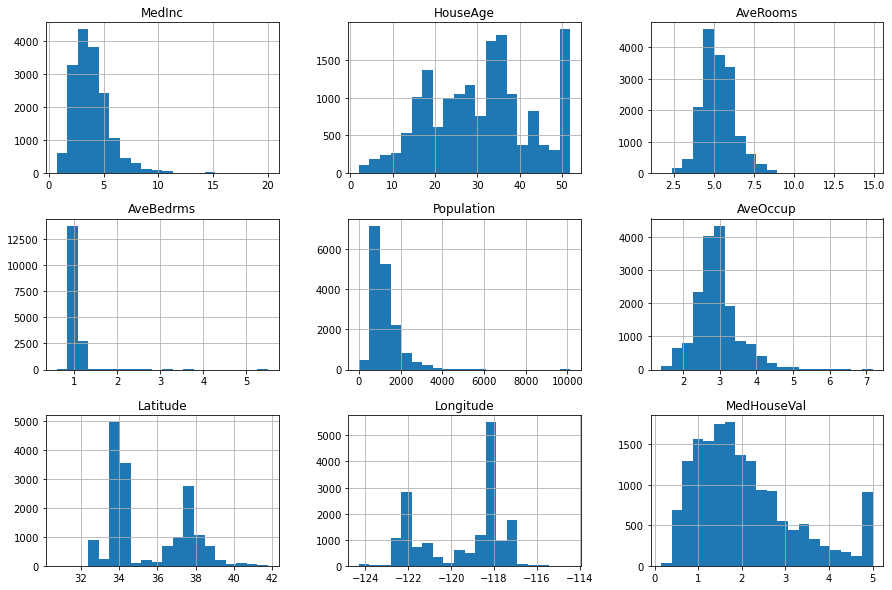

In [10]:
synt_data_gpt2xl.hist(bins=20, grid=True, figsize=(15, 10), layout=(3, 3))
plt.show()

In [11]:
synt_data_cerebras.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16640.000000  16640.000000  16640.000000  16640.000000  16640.000000   
mean       3.819480     31.035036      5.273812      1.050997   1211.923558   
std        1.693819     12.268758      1.053556      0.186954    620.378449   
min        0.489600      2.000000      1.331476      0.500000      2.000000   
25%        2.660700     21.000000      4.637598      1.004914    805.000000   
50%        3.566250     32.000000      5.163677      1.049090   1054.000000   
75%        4.635400     38.000000      5.883227      1.078571   1478.000000   
max       17.000100     52.000000     25.002725     21.000000   7092.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  16640.000000  16640.000000  16640.000000  16640.000000  
mean       2.897303     35.590327   -119.567128      2.070396  
std        0.574456      2.071251      1.942410      1.156376  
min        0.879195     21.860000   -124.210000      0.149990  
25%        2.552637     33.940000   -121.810000      1.202750  
50%        2.845463     34.180000   -118.430000      1.808000  
75%        3.149508     37.710000   -118.060000      2.651000  
max        6.818182     46.220000   -114.170000      5.000010

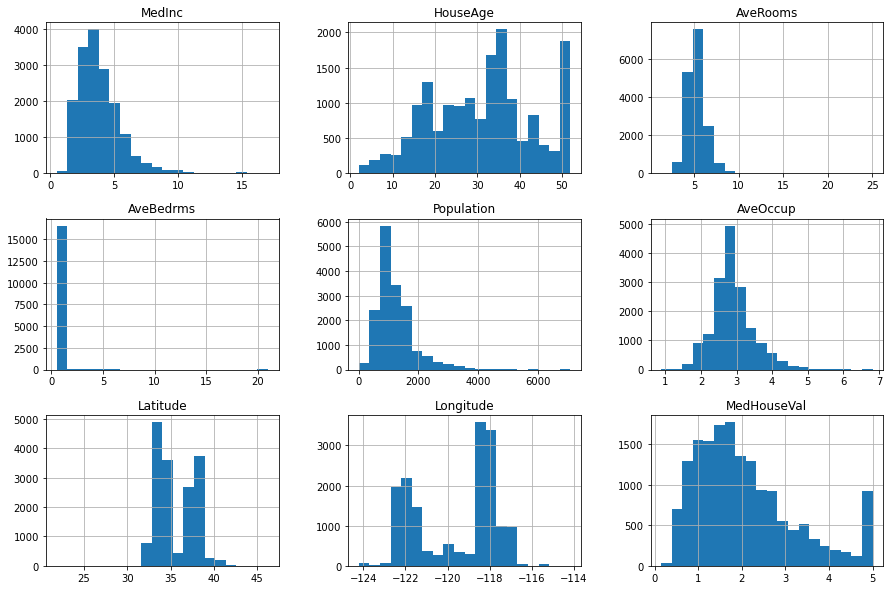

In [12]:
synt_data_cerebras.hist(bins=20, grid=True, figsize=(15, 10), layout=(3, 3))
plt.show()

In [13]:
synt_data_phi.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16640.000000  16640.000000  16640.000000  16640.000000  16640.000000   
mean       3.832509     30.697596      5.235565      1.046930   1250.705048   
std        1.726351     12.002154      1.053037      0.084699    657.698026   
min        0.636900      2.000000      0.912664      0.750000      2.000000   
25%        2.656300     21.000000      4.581908      1.004525    822.000000   
50%        3.576800     31.000000      5.089355      1.046952   1101.000000   
75%        4.634300     38.000000      5.857143      1.076923   1510.000000   
max       15.000100     52.000000     28.715789      5.087558  11901.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  16640.000000  16640.000000  16640.000000  16640.000000  
mean       2.932898     35.495194   -119.511400      2.068631  
std        0.601825      1.996016      1.917366      1.155033  
min        1.400000     32.560000   -124.270000      0.149990  
25%        2.567164     33.940000   -121.820000      1.201000  
50%        2.859373     34.160000   -118.390000      1.807000  
75%        3.226956     37.620000   -118.040000      2.649000  
max        6.567347     41.820000   -114.470000      5.000010

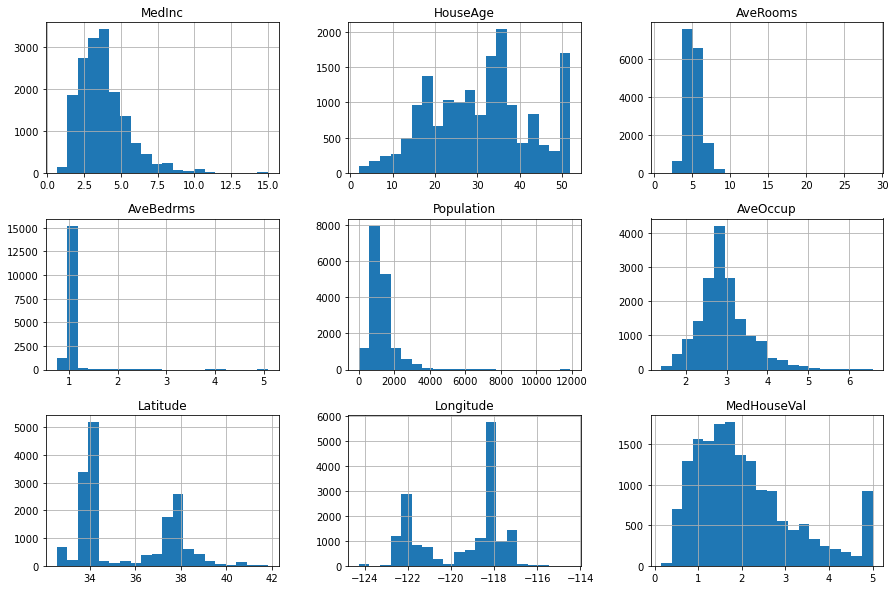

In [14]:
synt_data_phi.hist(bins=20, grid=True, figsize=(15, 10), layout=(3, 3))
plt.show()

In [15]:
synt_datasets = dict()
#synt_datasets['real'] = real_data
synt_datasets['distilgpt2'] = synt_data_distilgpt2
synt_datasets['gpt2xl'] = synt_data_gpt2xl
synt_datasets['cerebras'] = synt_data_cerebras
synt_datasets['phi'] = synt_data_phi

In [16]:
cols = real_data.columns

In [17]:
cols_compare = dict()
for col in cols:
    cols_compare[col] = {}
    cols_compare[col]['real'] = real_data[col].to_numpy()
    for synt in synt_datasets:
        cols_compare[col][synt] = synt_datasets[synt][col].to_numpy()


In [18]:
all_data = list()
for col in cols :
    all_data.append((col,[x for x in [(i,cols_compare[col][i]) for i in cols_compare[col]]]))


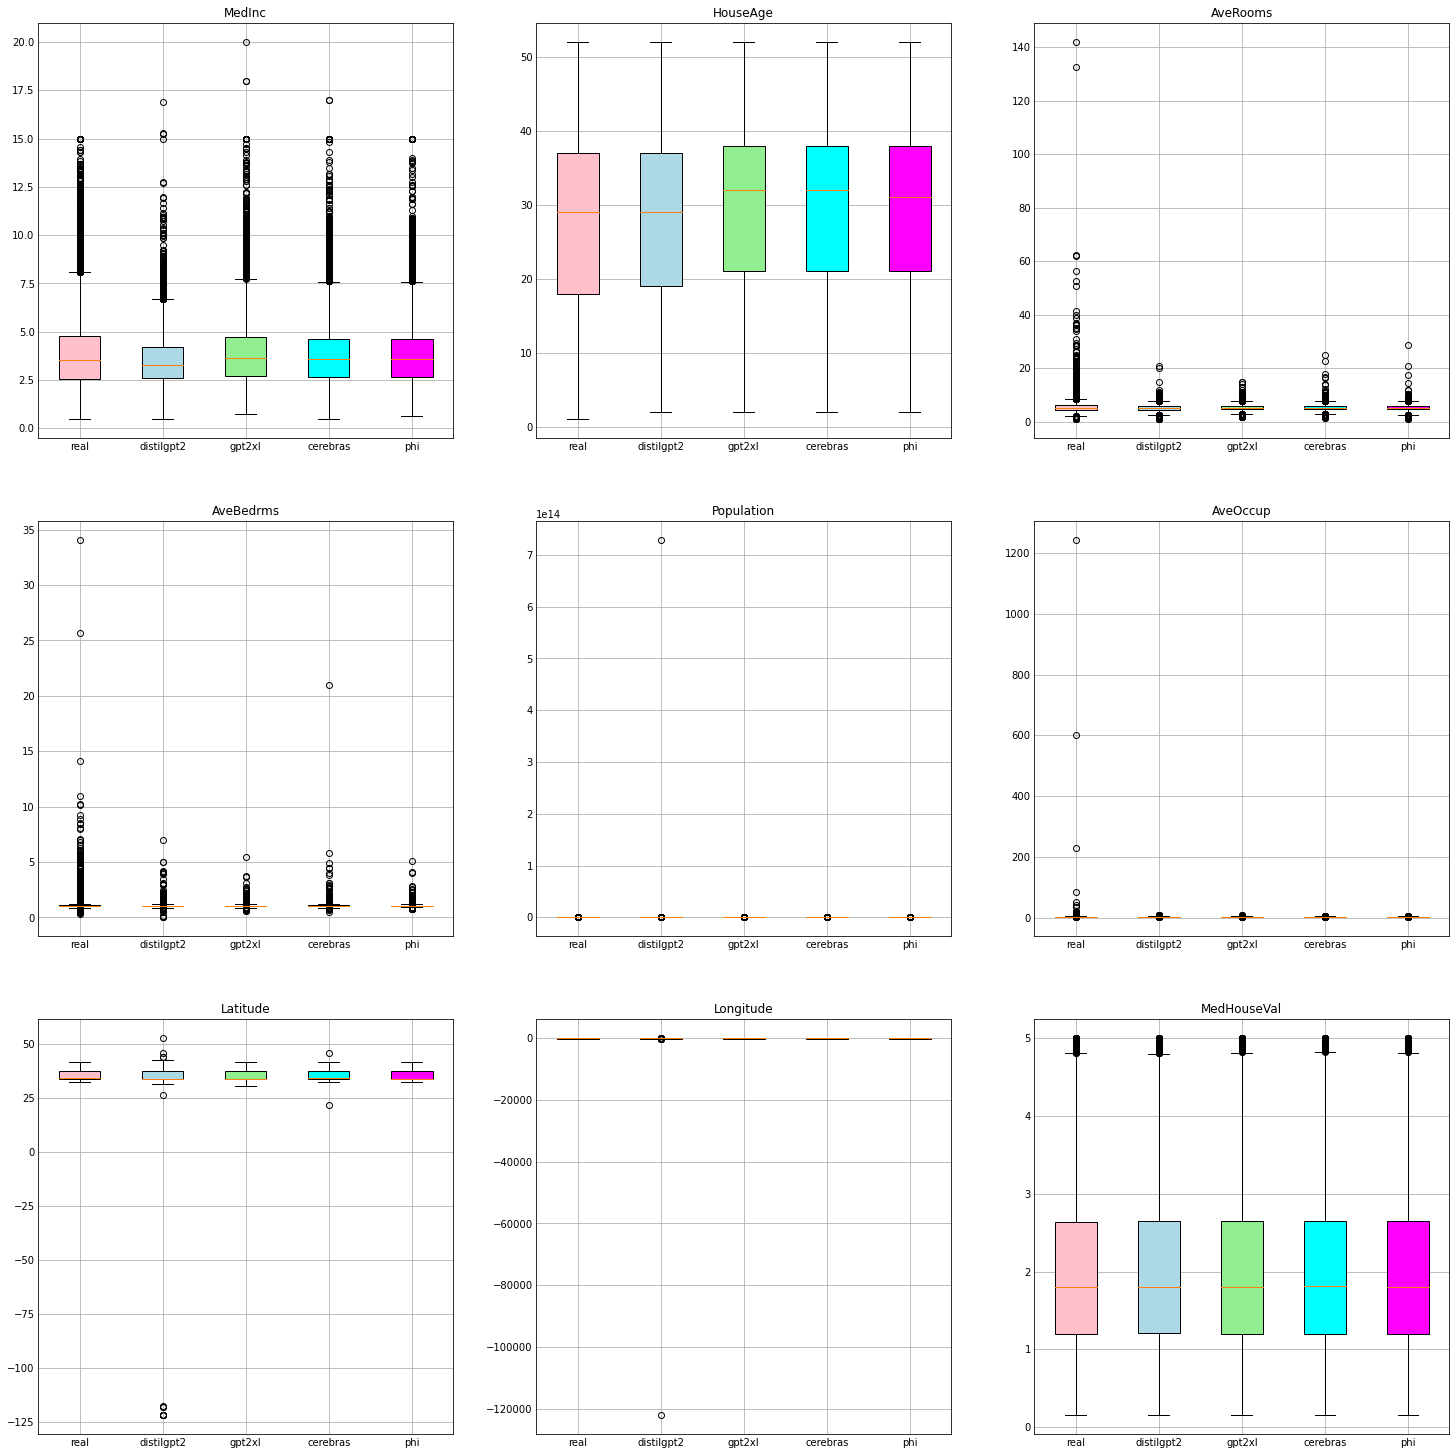

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data:
ncols=3
nrows=3

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
bplots = list()

for i, col in enumerate(all_data) :
    col_name = col[0]
    col_data = col[1]
    rw = i//ncols
    cl = i%ncols
    
    axs[rw,cl].set_title(col_name)
     
    bplots.append(axs[rw,cl].boxplot([x[1] for x in col_data],
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=[x[0] for x in col_data]))  # will be used to label x-ticks
           
#fill with colors
colors = ['pink', 'lightblue', 'lightgreen','cyan','magenta','yellow',]
for bplot in bplots:
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

plt.show()

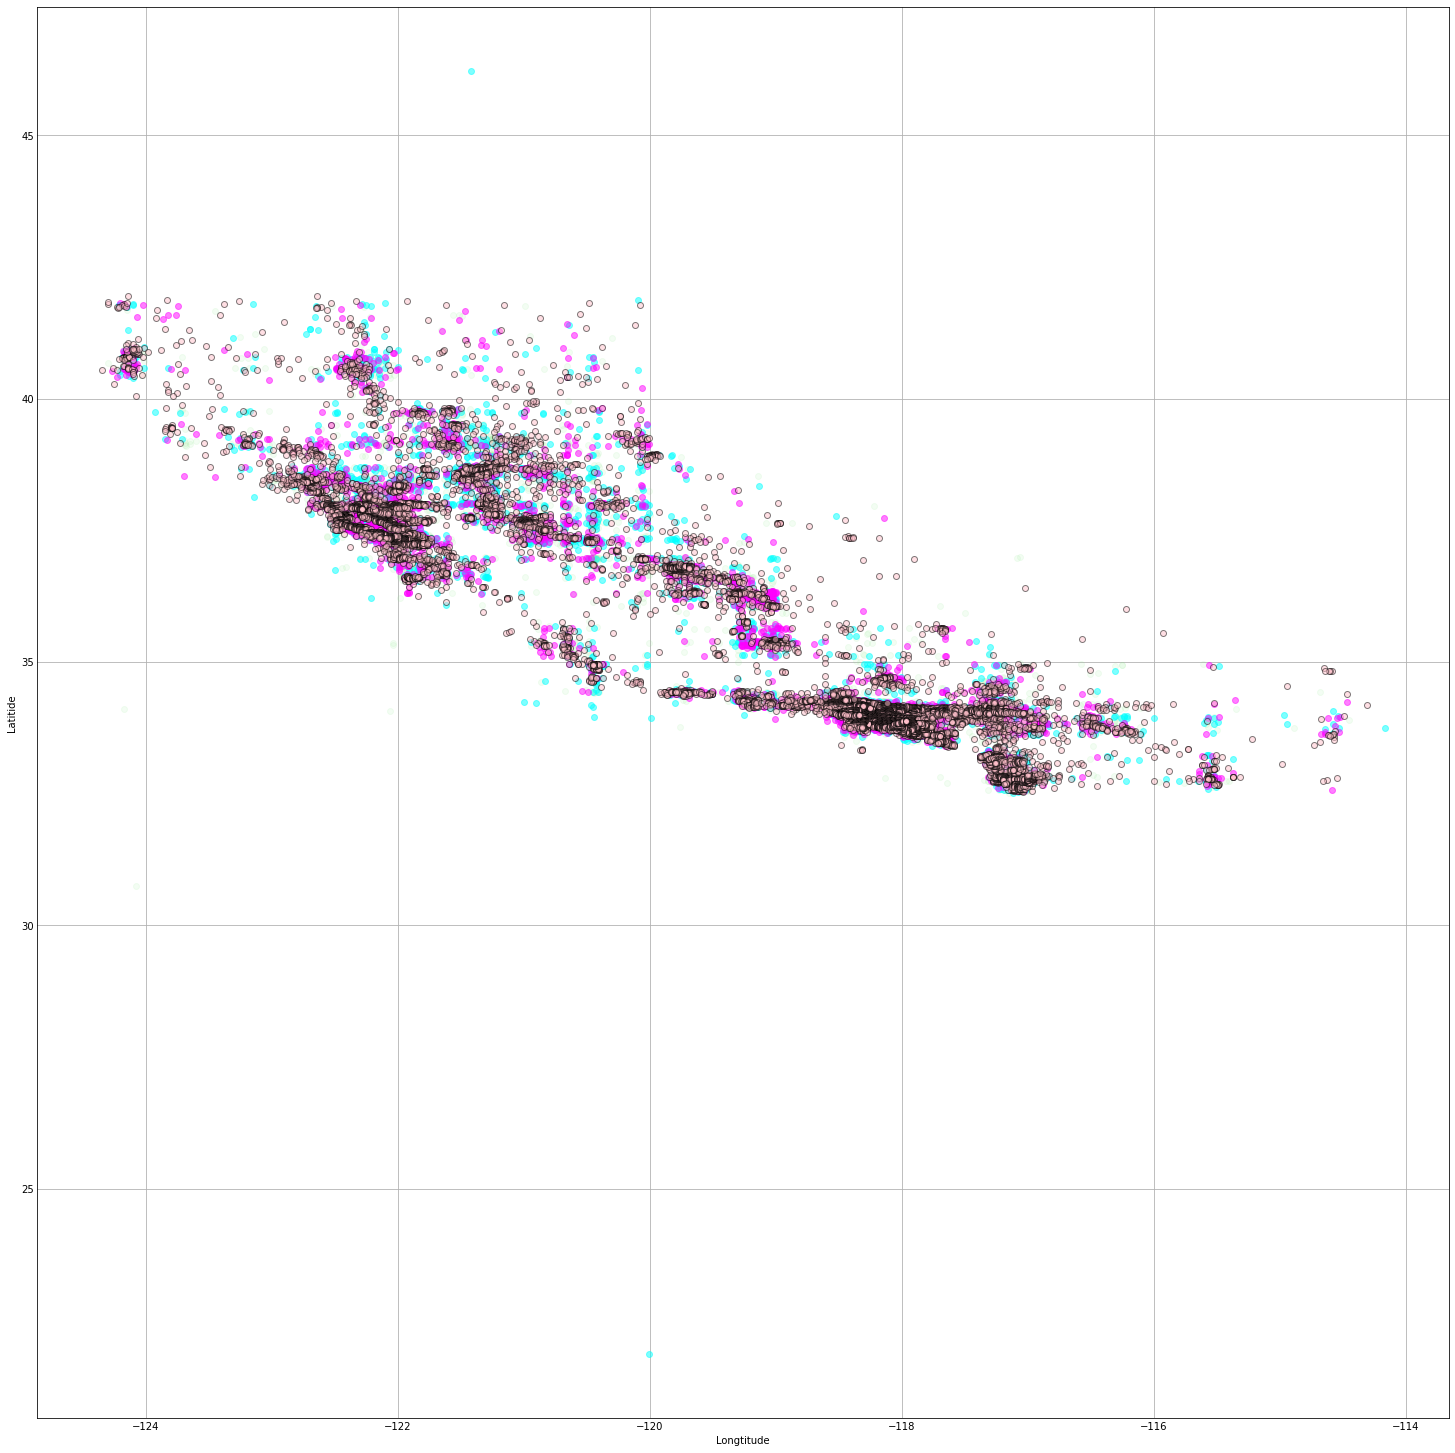

In [20]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlabel("Longtitude")
plt.ylabel("Latitide")
#ax.scatter(cols_compare['Longitude']['distilgpt2'], cols_compare['Latitude']['distilgpt2'],c='lightblue', label='distilgpt2', alpha=0.5, edgecolors='lightblue')
ax.scatter(cols_compare['Longitude']['gpt2xl'], cols_compare['Latitude']['gpt2xl'],c='lightgreen', label='gpt2xl', alpha=0.1, edgecolors='lightgreen')
ax.scatter(cols_compare['Longitude']['cerebras'], cols_compare['Latitude']['cerebras'],c='cyan', label='cerebras', alpha=0.5, edgecolors='cyan')
ax.scatter(cols_compare['Longitude']['phi'], cols_compare['Latitude']['phi'],c='magenta', label='phi', alpha=0.5, edgecolors='magenta')

ax.scatter(cols_compare['Longitude']['real'], cols_compare['Latitude']['real'],c='pink', label='real', alpha=0.5, edgecolors='black')

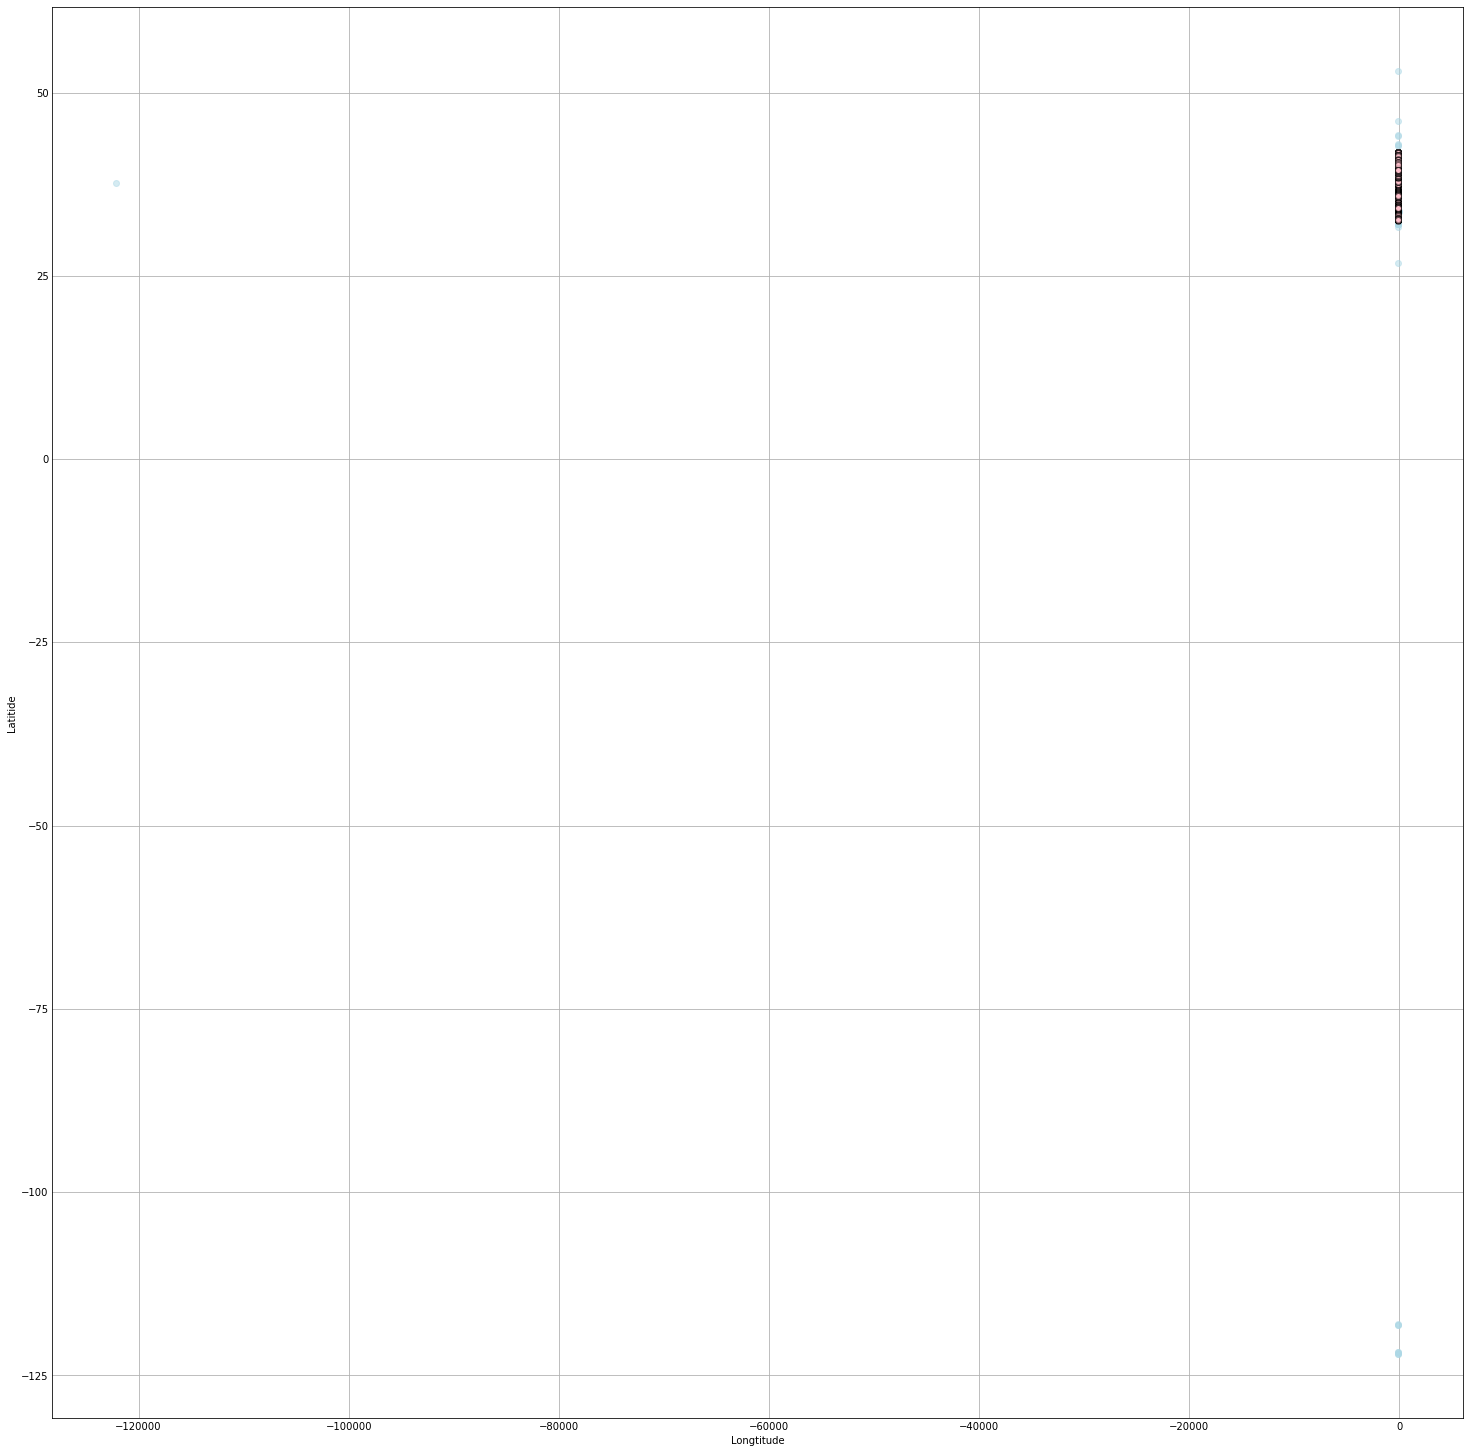

In [21]:
#outliers for distilgpt2 
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlabel("Longtitude")
plt.ylabel("Latitide")
ax.scatter(cols_compare['Longitude']['distilgpt2'], cols_compare['Latitude']['distilgpt2'],c='lightblue', label='distilgpt2', alpha=0.5, edgecolors='lightblue')
ax.scatter(cols_compare['Longitude']['real'], cols_compare['Latitude']['real'],c='pink', label='real', alpha=0.5, edgecolors='black')

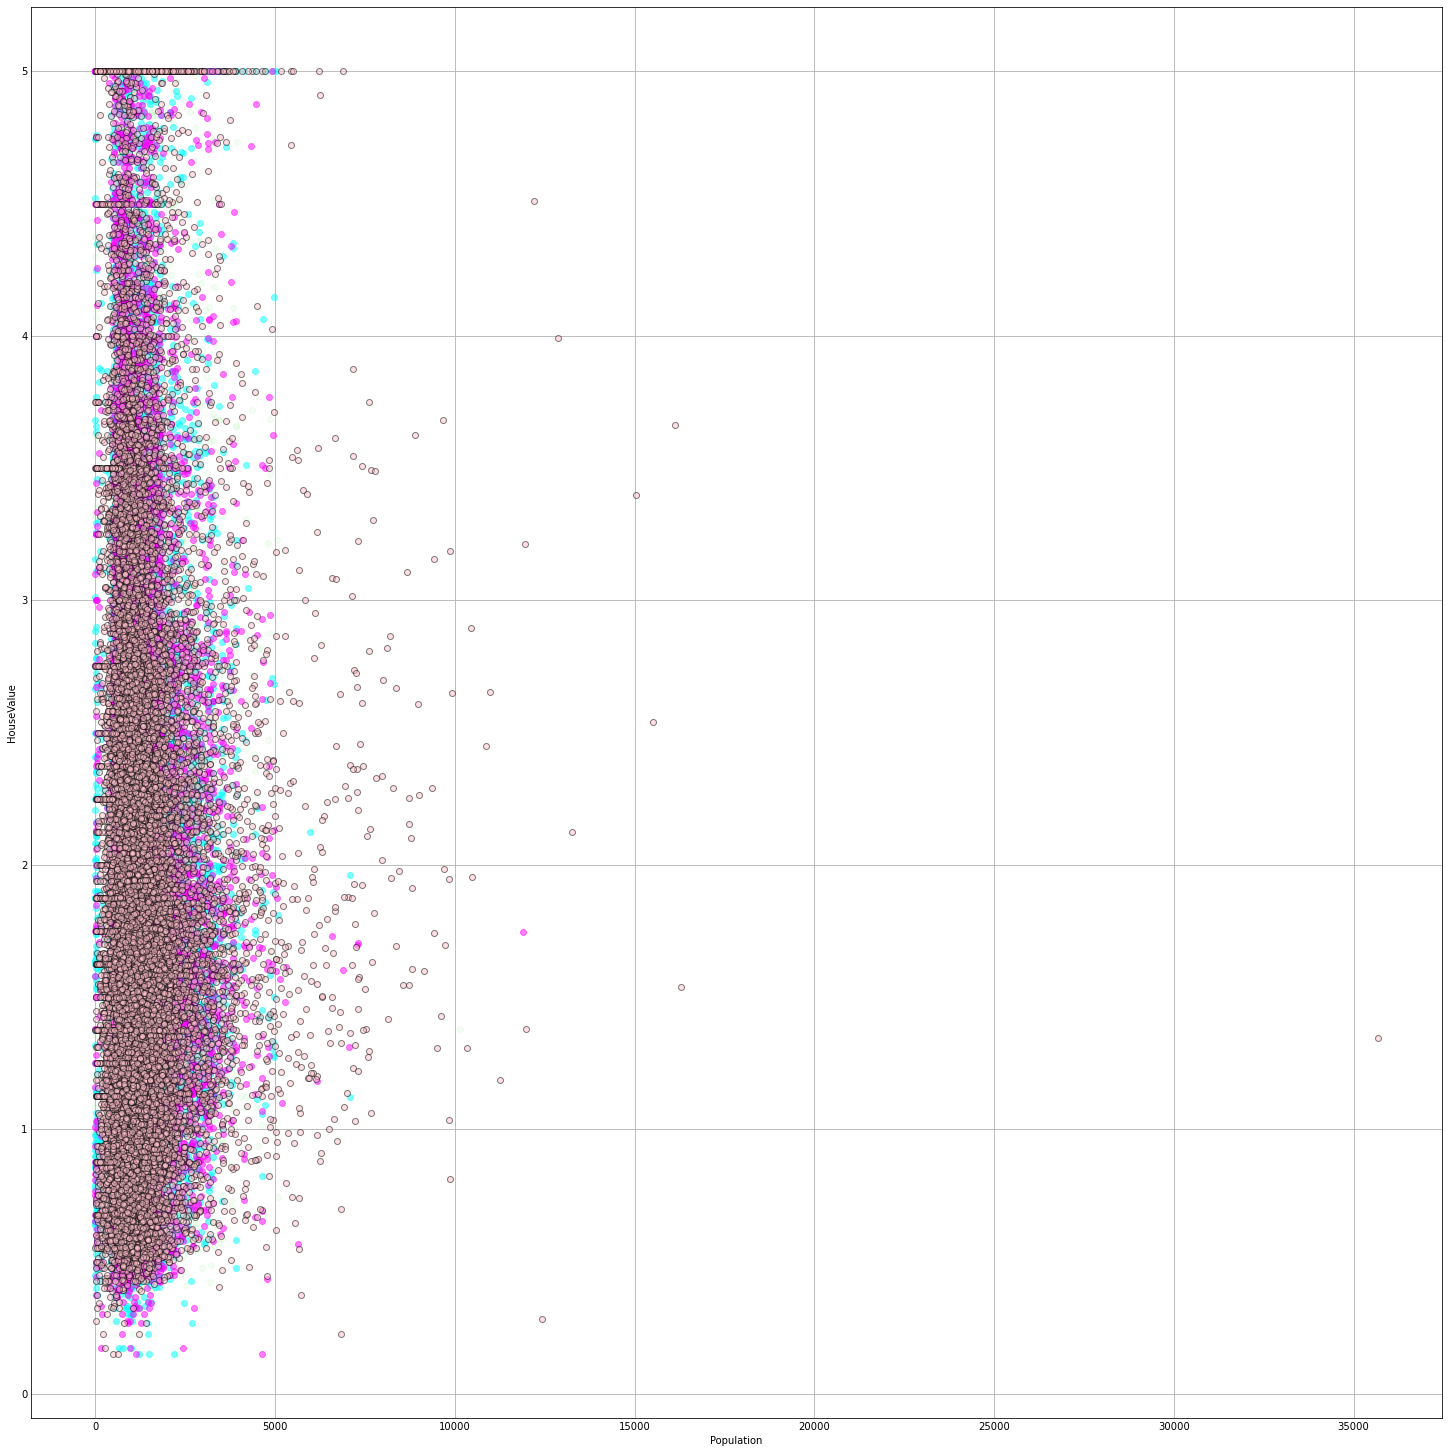

In [22]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlabel("Population")
plt.ylabel("HouseValue")
#ax.scatter(cols_compare['Longitude']['real'], cols_compare['Latitude']['real'],c='pink', label='real', alpha=0.5, edgecolors='black')
#ax.scatter(cols_compare['Population']['distilgpt2'], cols_compare['MedHouseVal']['distilgpt2'],c='lightblue', label='distilgpt2', alpha=0.5, edgecolors='lightblue')
ax.scatter(cols_compare['Population']['gpt2xl'], cols_compare['MedHouseVal']['gpt2xl'],c='lightgreen', label='gpt2xl', alpha=0.1, edgecolors='lightgreen')
ax.scatter(cols_compare['Population']['cerebras'], cols_compare['MedHouseVal']['cerebras'],c='cyan', label='cerebras', alpha=0.5, edgecolors='cyan')
ax.scatter(cols_compare['Population']['phi'], cols_compare['MedHouseVal']['phi'],c='magenta', label='phi', alpha=0.5, edgecolors='magenta')
ax.scatter(cols_compare['Population']['real'], cols_compare['MedHouseVal']['real'],c='pink', label='real', alpha=0.5, edgecolors='black')

# Regression task on rough data

In [23]:
y1 = real_data['MedHouseVal']
X1 = real_data.drop("MedHouseVal", axis=1)
X_tr1, X_te1, y_tr1, y_te1 = train_test_split(X1, y1, test_size=0.2, random_state=random_state)

In [24]:
# define column transformer 
col_transformer = ColumnTransformer([
    ("num_col_transformer", StandardScaler(), ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']),
],remainder='passthrough')


# define a Pipeline with 2 steps: 1. transform columns; 2. Apply the model
model = Pipeline([
    ("col_transformer", col_transformer),
    ("estimator", LinearRegression())
]
)

In [25]:
regression_pipe = Pipeline([
    ('Scaler', StandardScaler()),
    ('LR', Ridge())
])

reg_parameters = {
    'LR__solver': ['saga', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    'LR__alpha': [0.001, 0.01, 0.1, 1, 10],
}


## Real data regression

In [26]:
X_tr1, X_te1, y_tr1, y_te1 = train_test_split(X1, y1, test_size=0.2, random_state=random_state)

In [27]:
%%time
grid_pipe_log = GridSearchCV(regression_pipe, reg_parameters, cv=5, scoring='neg_root_mean_squared_error', verbose=3)
grid_pipe_log.fit(X_tr1, y_tr1)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.772 total time=   0.3s
[CV 2/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.712 total time=   0.5s
[CV 3/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.050 total time=   0.5s
[CV 4/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.709 total time=   0.4s
[CV 5/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.740 total time=   0.4s
[CV 1/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.772 total time=   0.0s
[CV 2/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.712 total time=   0.0s
[CV 3/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.050 total time=   0.0s
[CV 4/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.709 total time=   0.0s
[CV 5/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.740 total time=   0.0s
[CV 1/5] END LR__alpha=0.001, LR__solver=cholesky;, score=-0.772 total time=   0.0s
[CV 2/5] END LR__alpha=0.001, LR__solver=cho

[CV 1/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-0.772 total time=   0.1s
[CV 2/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-0.712 total time=   0.1s
[CV 3/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.050 total time=   0.1s
[CV 4/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-0.709 total time=   0.1s
[CV 5/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-0.740 total time=   0.1s
[CV 1/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-0.772 total time=   0.2s
[CV 2/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-0.712 total time=   0.2s
[CV 3/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-1.050 total time=   0.2s
[CV 4/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-0.709 total time=   0.2s
[CV 5/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-0.740 total time=   0.3s
[CV 1/5] END .....LR__alpha=0.1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....LR__alpha=0.1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....LR__alpha=

C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Conda\lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    re

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('LR', Ridge())]),
             param_grid={'LR__alpha': [0.001, 0.01, 0.1, 1, 10],
                         'LR__solver': ['saga', 'svd', 'cholesky', 'lsqr',
                                        'sparse_cg', 'sag', 'saga', 'lbfgs']},
             scoring='neg_root_mean_squared_error', verbose=3)

In [28]:
print(grid_pipe_log.best_score_)
print(grid_pipe_log.best_estimator_.steps[1][1])

-0.7963941997179204
Ridge(alpha=1, solver='svd')


In [29]:
y_tr_pr1 = grid_pipe_log.best_estimator_.predict(X_tr1)
mse_tr1 = mean_squared_error(y_tr1,y_tr_pr1, squared=True)
y_te_pr1 = grid_pipe_log.best_estimator_.predict(X_te1)
mse_te1 = mean_squared_error(y_te1,y_te_pr1, squared=True)

In [30]:
print('LR model real data: RMSE train =',mse_tr1,', RMSE test',mse_te1)

LR model real data: RMSE train = 0.520362665148444 , RMSE test 0.5274764719545153


In [31]:
model_results = pd.DataFrame(columns=['Model','Dataset','RMSE'])
res_test = pd.DataFrame([['Real data','Real test',
                        mse_te1]],
                        columns=['Model','Dataset','RMSE'])

model_results = pd.concat([model_results, res_test],axis=0)

C:\Users\AlexeyNeyman\AppData\Local\Temp\ipykernel_8720\3798510043.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_results = pd.concat([model_results, res_test],axis=0)


## DistillGPT2 regression

In [32]:
y2 = synt_data_distilgpt2['MedHouseVal']
X2 = synt_data_distilgpt2.drop("MedHouseVal", axis=1)
X_tr2, X_te2, y_tr2, y_te2 = train_test_split(X2, y2, test_size=0.2, random_state=random_state)

In [33]:
%%time
grid_pipe_log = GridSearchCV(regression_pipe, reg_parameters, cv=5, scoring='neg_root_mean_squared_error', verbose=3)
grid_pipe_log.fit(X_tr2, y_tr2)

print(grid_pipe_log.best_score_)
print(grid_pipe_log.best_estimator_.steps[1][1])

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.061 total time=   0.0s
[CV 2/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.046 total time=   0.0s
[CV 3/5] END LR__alpha=0.001, LR__solver=saga;, score=-10.941 total time=   0.0s
[CV 4/5] END LR__alpha=0.001, LR__solver=saga;, score=-72829172.862 total time=   0.0s
[CV 5/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.084 total time=   0.0s
[CV 1/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.061 total time=   0.0s
[CV 2/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.046 total time=   0.0s
[CV 3/5] END .LR__alpha=0.001, LR__solver=svd;, score=-10.940 total time=   0.0s
[CV 4/5] END LR__alpha=0.001, LR__solver=svd;, score=-72829864.108 total time=   0.0s
[CV 5/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.084 total time=   0.0s
[CV 1/5] END LR__alpha=0.001, LR__solver=cholesky;, score=-1.061 total time=   0.0s
[CV 2/5] END LR__alpha=0.001, LR_

[CV 1/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.061 total time=   0.0s
[CV 2/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.046 total time=   0.0s
[CV 3/5] END ...LR__alpha=0.1, LR__solver=sag;, score=-10.940 total time=   0.0s
[CV 4/5] END LR__alpha=0.1, LR__solver=sag;, score=-72825846.881 total time=   0.0s
[CV 5/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.084 total time=   0.0s
[CV 1/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-1.061 total time=   0.0s
[CV 2/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-1.046 total time=   0.0s
[CV 3/5] END ..LR__alpha=0.1, LR__solver=saga;, score=-10.940 total time=   0.0s
[CV 4/5] END LR__alpha=0.1, LR__solver=saga;, score=-72810456.915 total time=   0.0s
[CV 5/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-1.084 total time=   0.0s
[CV 1/5] END .....LR__alpha=0.1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....LR__alpha=0.1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....LR_

C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Conda\lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    re

In [34]:
y_tr_pr2 = grid_pipe_log.best_estimator_.predict(X_tr2)
mse_tr2 = mean_squared_error(y_tr2,y_tr_pr2, squared=True)
y_te_pr2 = grid_pipe_log.best_estimator_.predict(X_te2)
mse_te2 = mean_squared_error(y_te2,y_te_pr2, squared=True)
y_tr_pr12 = grid_pipe_log.best_estimator_.predict(X_tr1)
mse_tr12 = mean_squared_error(y_tr1,y_tr_pr12,squared=False)
y_te_pr12 = grid_pipe_log.best_estimator_.predict(X_te1)
mse_te12 = mean_squared_error(y_te1,y_te_pr12,squared=False)

In [35]:
print('LR model Distilled GPT syntetic data: MSE train =',mse_tr2,', MSE test',mse_te2)
print('LR model Distilled GPT syntetic data: MSE from real train data =',mse_tr12,', MSE from real test data',mse_te12)

LR model Distilled GPT syntetic data: MSE train = 1.1311532548991132 , MSE test 1.1729309022204844
LR model Distilled GPT syntetic data: MSE from real train data = 1.0044577691107923 , MSE from real test data 0.9102873264513786


In [36]:
res_test = pd.DataFrame([['Distilled GPT','Synth test',
                        mse_te2],['Distilled GPT','Real test',
                        mse_te12]],
                        columns=['Model','Dataset','RMSE'])

model_results = pd.concat([model_results, res_test],axis=0)

## GPT2XL regression

In [37]:
y3 = synt_data_gpt2xl['MedHouseVal']
X3 = synt_data_gpt2xl.drop("MedHouseVal", axis=1)
X_tr3, X_te3, y_tr3, y_te3 = train_test_split(X3, y3, test_size=0.2, random_state=random_state)

In [38]:
%%time
grid_pipe_log = GridSearchCV(regression_pipe, reg_parameters, cv=5, scoring='neg_root_mean_squared_error', verbose=3)
grid_pipe_log.fit(X_tr3, y_tr3)

print(grid_pipe_log.best_score_)
print(grid_pipe_log.best_estimator_.steps[1][1])

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.682 total time=   0.0s
[CV 2/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.679 total time=   0.1s
[CV 3/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.690 total time=   0.1s
[CV 4/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.653 total time=   0.1s
[CV 5/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.693 total time=   0.1s
[CV 1/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.682 total time=   0.0s
[CV 2/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.679 total time=   0.0s
[CV 3/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.690 total time=   0.0s
[CV 4/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.653 total time=   0.0s
[CV 5/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.693 total time=   0.0s
[CV 1/5] END LR__alpha=0.001, LR__solver=cholesky;, score=-0.682 total time=   0.0s
[CV 2/5] END LR__alpha=0.001, LR__solver=cho

[CV 3/5] END LR__alpha=0.1, LR__solver=sparse_cg;, score=-0.690 total time=   0.0s
[CV 4/5] END LR__alpha=0.1, LR__solver=sparse_cg;, score=-0.653 total time=   0.0s
[CV 5/5] END LR__alpha=0.1, LR__solver=sparse_cg;, score=-0.693 total time=   0.0s
[CV 1/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-0.682 total time=   0.0s
[CV 2/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-0.679 total time=   0.0s
[CV 3/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-0.690 total time=   0.0s
[CV 4/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-0.653 total time=   0.0s
[CV 5/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-0.693 total time=   0.0s
[CV 1/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-0.682 total time=   0.0s
[CV 2/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-0.679 total time=   0.1s
[CV 3/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-0.690 total time=   0.1s
[CV 4/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-0.653 total time=   0.1s
[CV 5/5] END ...LR__al

C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Conda\lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    re

-0.6792398716978987
Ridge(alpha=1, solver='saga')
CPU times: total: 12.2 s
Wall time: 12.5 s


In [39]:
y_tr_pr3 = grid_pipe_log.best_estimator_.predict(X_tr3)
mse_tr3 = mean_squared_error(y_tr3,y_tr_pr3, squared=True)
y_te_pr3 = grid_pipe_log.best_estimator_.predict(X_te3)
mse_te3 = mean_squared_error(y_te3,y_te_pr3, squared=True)
y_tr_pr13 = grid_pipe_log.best_estimator_.predict(X_tr1)
mse_tr13 = mean_squared_error(y_tr1,y_tr_pr13,squared=False)
y_te_pr13 = grid_pipe_log.best_estimator_.predict(X_te1)
mse_te13 = mean_squared_error(y_te1,y_te_pr13,squared=False)

In [40]:
print('LR model GPT2XL syntetic data: MSE train =',mse_tr3,', MSE test',mse_te3)
print('LR model GPT2XL syntetic data: MSE from real train data =',mse_tr13,', MSE from real test data',mse_te13)

LR model GPT2XL syntetic data: MSE train = 0.4607158451881892 , MSE test 0.46878283303804125
LR model GPT2XL syntetic data: MSE from real train data = 4.824959230130625 , MSE from real test data 0.815326607721317


In [41]:
res_test = pd.DataFrame([['GPT2XL','Synth test',
                        mse_te3],['GPT2XL','Real test',
                        mse_te13]],
                        columns=['Model','Dataset','RMSE'])

model_results = pd.concat([model_results, res_test],axis=0)

## Cerebras regression

In [42]:
y4 = synt_data_cerebras['MedHouseVal']
X4 = synt_data_cerebras.drop("MedHouseVal", axis=1)
X_tr4, X_te4, y_tr4, y_te4 = train_test_split(X4, y4, test_size=0.2, random_state=random_state)

In [43]:
%%time
grid_pipe_log = GridSearchCV(regression_pipe, reg_parameters, cv=5, scoring='neg_root_mean_squared_error', verbose=3)
grid_pipe_log.fit(X_tr4, y_tr4)

print(grid_pipe_log.best_score_)
print(grid_pipe_log.best_estimator_.steps[1][1])

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.696 total time=   0.1s
[CV 2/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.688 total time=   0.4s
[CV 3/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.663 total time=   0.3s
[CV 4/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.668 total time=   0.3s
[CV 5/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.671 total time=   0.3s
[CV 1/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.696 total time=   0.0s
[CV 2/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.688 total time=   0.0s
[CV 3/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.663 total time=   0.0s
[CV 4/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.668 total time=   0.0s
[CV 5/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.671 total time=   0.0s
[CV 1/5] END LR__alpha=0.001, LR__solver=cholesky;, score=-0.696 total time=   0.0s
[CV 2/5] END LR__alpha=0.001, LR__solver=cho

[CV 2/5] END LR__alpha=0.1, LR__solver=sparse_cg;, score=-0.688 total time=   0.0s
[CV 3/5] END LR__alpha=0.1, LR__solver=sparse_cg;, score=-0.663 total time=   0.0s
[CV 4/5] END LR__alpha=0.1, LR__solver=sparse_cg;, score=-0.668 total time=   0.0s
[CV 5/5] END LR__alpha=0.1, LR__solver=sparse_cg;, score=-0.671 total time=   0.0s
[CV 1/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-0.696 total time=   0.0s
[CV 2/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-0.688 total time=   0.1s
[CV 3/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-0.663 total time=   0.1s
[CV 4/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-0.668 total time=   0.1s
[CV 5/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-0.671 total time=   0.1s
[CV 1/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-0.696 total time=   0.1s
[CV 2/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-0.688 total time=   0.3s
[CV 3/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-0.663 total time=   0.3s
[CV 4/5] END ...LR__

C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Conda\lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    re

-0.6769147479707858
Ridge(alpha=10, solver='sag')
CPU times: total: 24.5 s
Wall time: 25.3 s


In [44]:
y_tr_pr4 = grid_pipe_log.best_estimator_.predict(X_tr4)
mse_tr4 = mean_squared_error(y_tr4,y_tr_pr4, squared=True)
y_te_pr4 = grid_pipe_log.best_estimator_.predict(X_te4)
mse_te4 = mean_squared_error(y_te4,y_te_pr4, squared=True)
y_tr_pr14 = grid_pipe_log.best_estimator_.predict(X_tr1)
mse_tr14 = mean_squared_error(y_tr1,y_tr_pr14,squared=False)
y_te_pr14 = grid_pipe_log.best_estimator_.predict(X_te1)
mse_te14 = mean_squared_error(y_te1,y_te_pr14,squared=False)

In [45]:
print('LR model Cerebras syntetic data: MSE train =',mse_tr4,', MSE test',mse_te4)
print('LR model Cerebras syntetic data: MSE from real train data =',mse_tr14,', MSE from real test data',mse_te14)

LR model Cerebras syntetic data: MSE train = 0.45027300498029244 , MSE test 0.4344088226638936
LR model Cerebras syntetic data: MSE from real train data = 4.837551548303524 , MSE from real test data 0.8334628821883184


In [46]:
res_test = pd.DataFrame([['Cerebras','Synth test',
                        mse_te4],['Cerebras','Real test',
                        mse_te14]],
                        columns=['Model','Dataset','RMSE'])

model_results = pd.concat([model_results, res_test],axis=0)

## Phi1.5 regression

In [47]:
y5 = synt_data_phi['MedHouseVal']
X5 = synt_data_phi.drop("MedHouseVal", axis=1)
X_tr5, X_te5, y_tr5, y_te5 = train_test_split(X5, y5, test_size=0.2, random_state=random_state)

In [48]:
%%time
grid_pipe_log = GridSearchCV(regression_pipe, reg_parameters, cv=5, scoring='neg_root_mean_squared_error', verbose=3)
grid_pipe_log.fit(X_tr5, y_tr5)

print(grid_pipe_log.best_score_)
print(grid_pipe_log.best_estimator_.steps[1][1])

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.647 total time=   0.0s
[CV 2/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.648 total time=   0.0s
[CV 3/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.664 total time=   0.1s
[CV 4/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.643 total time=   0.0s
[CV 5/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.644 total time=   0.1s
[CV 1/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.647 total time=   0.0s
[CV 2/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.648 total time=   0.0s
[CV 3/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.664 total time=   0.0s
[CV 4/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.643 total time=   0.0s
[CV 5/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.644 total time=   0.0s
[CV 1/5] END LR__alpha=0.001, LR__solver=cholesky;, score=-0.647 total time=   0.0s
[CV 2/5] END LR__alpha=0.001, LR__solver=cho

[CV 2/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-0.648 total time=   0.0s
[CV 3/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-0.664 total time=   0.0s
[CV 4/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-0.643 total time=   0.0s
[CV 5/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-0.644 total time=   0.0s
[CV 1/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-0.647 total time=   0.0s
[CV 2/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-0.648 total time=   0.0s
[CV 3/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-0.664 total time=   0.0s
[CV 4/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-0.643 total time=   0.0s
[CV 5/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-0.644 total time=   0.0s
[CV 1/5] END .....LR__alpha=0.1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....LR__alpha=0.1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....LR__alpha=0.1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .....LR__alpha=

C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Conda\lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    re

In [49]:
y_tr_pr5 = grid_pipe_log.best_estimator_.predict(X_tr5)
mse_tr5 = mean_squared_error(y_tr5,y_tr_pr5, squared=True)
y_te_pr5 = grid_pipe_log.best_estimator_.predict(X_te5)
mse_te5 = mean_squared_error(y_te5,y_te_pr5, squared=True)
y_tr_pr15 = grid_pipe_log.best_estimator_.predict(X_tr1)
mse_tr15 = mean_squared_error(y_tr1,y_tr_pr15,squared=False)
y_te_pr15 = grid_pipe_log.best_estimator_.predict(X_te1)
mse_te15 = mean_squared_error(y_te1,y_te_pr15,squared=False)

In [50]:
print('LR model Phi15 syntetic data: MSE train =',mse_tr5,', MSE test',mse_te5)
print('LR model Phi15 syntetic data: MSE from real train data =',mse_tr15,', MSE from real test data',mse_te15)

LR model Phi15 syntetic data: MSE train = 0.42095822877421946 , MSE test 0.417365412928186
LR model Phi15 syntetic data: MSE from real train data = 4.987763794928446 , MSE from real test data 0.81985353069281


In [51]:
res_test = pd.DataFrame([['Phi15','Synth test',
                        mse_te5],['Phi15','Real test',
                        mse_te15]],
                        columns=['Model','Dataset','RMSE'])

model_results = pd.concat([model_results, res_test],axis=0)

## Modelling results 

In [52]:
model_results

Model     Dataset      RMSE
0      Real data   Real test  0.527476
0  Distilled GPT  Synth test  1.172931
1  Distilled GPT   Real test  0.910287
0         GPT2XL  Synth test  0.468783
1         GPT2XL   Real test  0.815327
0       Cerebras  Synth test  0.434409
1       Cerebras   Real test  0.833463
0          Phi15  Synth test  0.417365
1          Phi15   Real test  0.819854

In [53]:
model_results.to_csv('model_results_shorthouses_temp0.7.csv')

# Privacy metrics

In [54]:
from pandas import DataFrame, Series
from typing import List, Tuple, Dict, Callable
import scipy.stats as ss
from sklearn.neighbors import NearestNeighbors
from scipy.stats import mannwhitneyu, chisquare, ks_2samp



In [55]:
# bound value to determine quantiles
dcr_quantile = 0.95
# how many bins should be created for privacy histograms
privacy_number_of_bins = 30
#to avoid devision by zero
smoothing_factor = 1e-8
#test sample ratio
ratio = 0.5

random_state = 12*13*99*17-1

In [56]:
tgt_train = real_data
tgt_test = control_dataset

In [57]:
nn_model = NearestNeighbors(metric='minkowski', algorithm="ball_tree",n_jobs=None)
nn_model.fit(tgt_train)

NearestNeighbors(algorithm='ball_tree')

## Real data privacy

In [58]:
tgt_test_neighbors = nn_model.kneighbors(tgt_test, n_neighbors=2)

In [59]:
print('Stats : mean, std, max, min, amount')
dcr_real = tgt_test_neighbors[0][:, 0]
#print('DCR  stats', dcr_real.mean(), dcr_real.std(), dcr_real.max(), dcr_real.min(), len(dcr_real))
dcr2_real = tgt_test_neighbors[0][:, 1]
#print('DCR2 stats', dcr2_real.mean(), dcr2_real.std(), dcr2_real.max(), dcr2_real.min(), len (dcr2_real))
nndr_real = dcr_real / np.maximum(dcr2_real, smoothing_factor)    
print('NNDR stats', nndr_real.mean(), nndr_real.std(), nndr_real.max(), nndr_real.min(), len (nndr_real))
baseline_dcr = dcr_real
bound = np.quantile(baseline_dcr[~np.isnan(baseline_dcr)], dcr_quantile)
dcr_real_norm = np.where(dcr_real <= bound, dcr_real / bound, 1)
print('nDCR stats', dcr_real_norm.mean(), dcr_real_norm.std(), dcr_real_norm.max(), dcr_real_norm.min(), len(dcr_real_norm))
print('Bound',bound)

Stats : mean, std, max, min, amount
NNDR stats 0.8049014780886282 0.15945074183200192 0.9999979823195819 0.07821550603275805 4000
nDCR stats 0.49974653137970304 0.20714787051051878 1.0 0.030742811948517867 4000
Bound 7.432462929776719


array([[<AxesSubplot:title={'center':'Distance to Closest Record (DCR) for RealData'}>,
        <AxesSubplot:title={'center':'Normal Distance to Closest Record (nDCR) for RealData'}>,
        <AxesSubplot:title={'center':'Nearest Neighbor Distance Ratio (NNDR) for RealData'}>]],
      dtype=object)

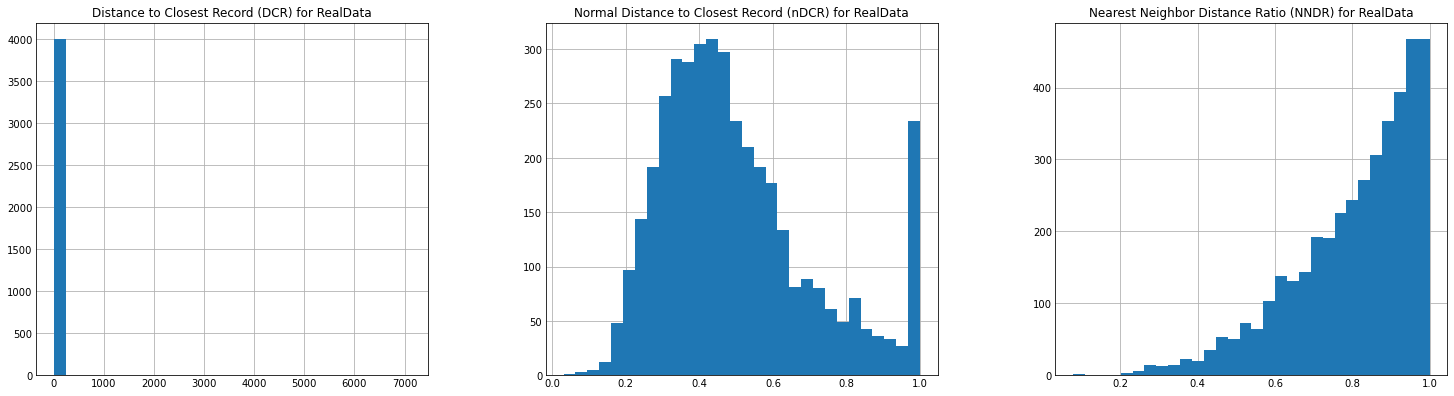

In [60]:
real_privacy = pd.DataFrame(zip(dcr_real,dcr_real_norm,nndr_real),columns=['Distance to Closest Record (DCR) for RealData','Normal Distance to Closest Record (nDCR) for RealData','Nearest Neighbor Distance Ratio (NNDR) for RealData'])
real_privacy.hist(bins=privacy_number_of_bins, grid=True, figsize=(20, 5), layout=(1, 3))

In [61]:
def calc_dcr_ratio(real_dcr:np.array, synt_dcr:np.array):
    med_real = np.median(real_dcr) 
    ordered_synt = np.sort(synt_dcr)
    middle = len(ordered_synt)//2
    if ordered_synt[middle] <= med_real :
        for i in range(middle) :
            if (i == middle) or (ordered_synt[middle+i+1] >= med_real) :
                break
        first_median_synt = middle + i
    else:
        for i in range(middle) :
            if (i == middle) or (ordered_synt[middle-i-1] < med_real) :
                break
        first_median_synt = middle - i
    return (len(ordered_synt)-first_median_synt)/max(first_median_synt,smoothing_factor)

In [62]:
def calc_nndr_ratio(real_nndr:np.array, synt_nndr:np.array):
    med_real = np.median(real_nndr) 
    ordered_synt = np.sort(synt_nndr)
    middle = len(ordered_synt)//2
    if ordered_synt[middle] <= med_real :
        for i in range(middle) :
            if (i == middle) or (ordered_synt[middle+i+1] >= med_real) :
                break
        first_median_synt = middle + i
    else:
        for i in range(middle) :
            if (i == middle) or (ordered_synt[middle-i-1] < med_real) :
                break
        first_median_synt = middle - i
    return (len(ordered_synt)-first_median_synt)/max(first_median_synt,smoothing_factor)

In [63]:
calc_dcr_ratio(dcr_real_norm,dcr_real_norm.copy())

1.0

In [64]:
calc_nndr_ratio(nndr_real,nndr_real.copy())

1.0

In [65]:
privacy_results = pd.DataFrame(columns=['Model','95% bound','DCRn ratio','NNDR ratio','DCRn median', 'NNDR median','Minimal distance'])

In [66]:
res_privacy = pd.DataFrame([['Real dataset', bound,
                        calc_dcr_ratio(dcr_real_norm,dcr_real_norm.copy()),
                        calc_nndr_ratio(nndr_real,nndr_real.copy()),
                        np.median(dcr_real_norm),
                        np.median(nndr_real),
                        dcr_real_norm.min()    ]],
                        columns=['Model','95% bound','DCRn ratio','NNDR ratio','DCRn median', 'NNDR median','Minimal distance'])

privacy_results = pd.concat([privacy_results, res_privacy],axis=0)

C:\Users\AlexeyNeyman\AppData\Local\Temp\ipykernel_8720\106412619.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  privacy_results = pd.concat([privacy_results, res_privacy],axis=0)


## DistillGPT2 privacy

In [67]:
syn_test1 = synt_data_distilgpt2.sample(n=4000) 

In [68]:
syn_test_neightbors1 = nn_model.kneighbors(syn_test1, n_neighbors=2)

In [69]:
print('Stats : mean, std, max, min, amount')
dcr_synt1 = syn_test_neightbors1[0][:, 0]
#print('DCR  stats', dcr_synt1.mean(), dcr_synt1.std(), dcr_synt1.max(), dcr_synt1.min(), len (dcr_synt1))
dcr2_synt1 = syn_test_neightbors1[0][:, 1]
#print('DCR2 stats', dcr2_synt1.mean(), dcr2_synt1.std(), dcr2_synt1.max(), dcr2_synt1.min(), len (dcr2_synt1))
nndr_synt1 = dcr_synt1 / np.maximum(dcr2_synt1, smoothing_factor)    
baseline_dcr = dcr_synt1
bound1 = np.quantile(baseline_dcr[~np.isnan(baseline_dcr)], dcr_quantile)
print('NNDR stats', nndr_synt1.mean(), nndr_synt1.std(), nndr_synt1.max(), nndr_synt1.min(), len (nndr_synt1))
dcr_synt_norm1 = np.where(dcr_synt1 <= bound, dcr_synt1 / bound, 1)
print('nDCR stats', dcr_synt_norm1.mean(), dcr_synt_norm1.std(), dcr_synt_norm1.max(), dcr_synt_norm1.min(), len(dcr_synt_norm1))

Stats : mean, std, max, min, amount
NNDR stats 0.8459537900890299 0.13722879514575695 0.9999999999734042 0.06805206293087816 4000
nDCR stats 0.5193414206635014 0.17608586504192839 1.0 0.07503865851013235 4000


array([[<AxesSubplot:title={'center':'Distance to Closest Record (DCR) for DistillGPT synthetics '}>,
        <AxesSubplot:title={'center':'Normal Distance to Closest Record (nDCR) for DistillGPT synthetics'}>,
        <AxesSubplot:title={'center':'Nearest Neighbor Distance Ratio (NNDR) for DistillGPT synthetics'}>]],
      dtype=object)

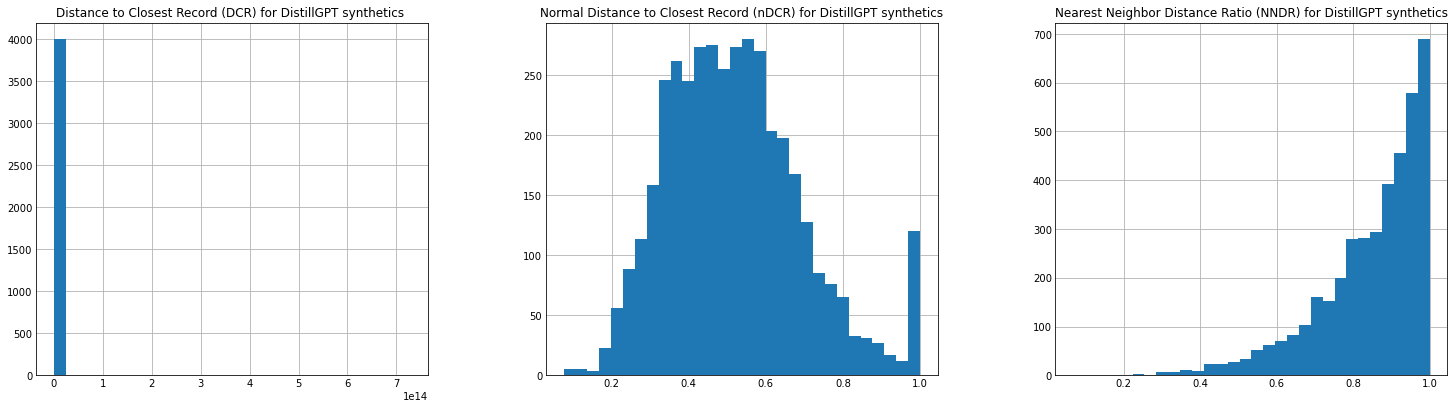

In [70]:
synt_privacy = pd.DataFrame(zip(dcr_synt1,dcr_synt_norm1,nndr_synt1),columns=['Distance to Closest Record (DCR) for DistillGPT synthetics ','Normal Distance to Closest Record (nDCR) for DistillGPT synthetics','Nearest Neighbor Distance Ratio (NNDR) for DistillGPT synthetics'])
synt_privacy.hist(bins=privacy_number_of_bins, grid=True, figsize=(20, 5), layout=(1, 3))

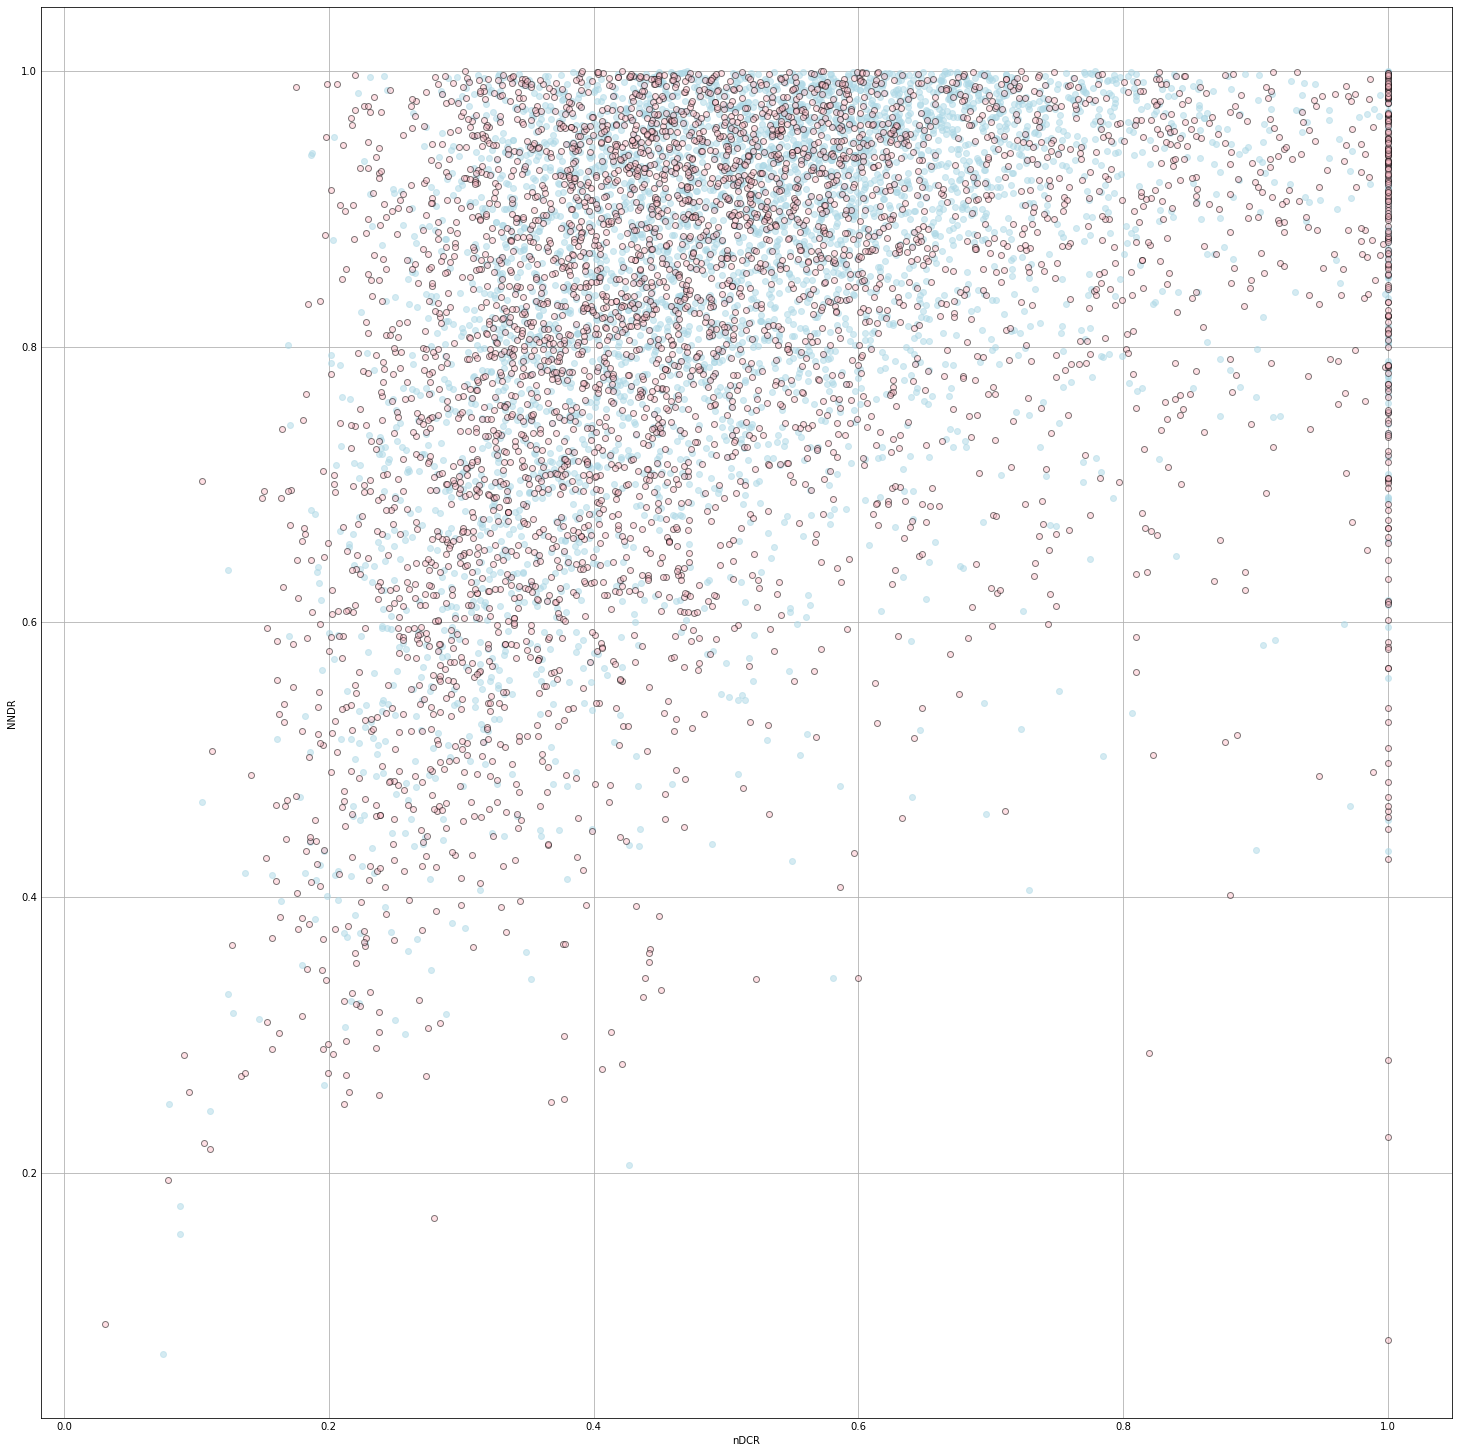

In [71]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlabel("nDCR")
plt.ylabel("NNDR")
#ax.scatter(cols_compare['Longitude']['gpt2xl'], cols_compare['Latitude']['gpt2xl'],c='lightgreen', label='gpt2xl', alpha=0.1, edgecolors='lightgreen')
#ax.scatter(cols_compare['Longitude']['cerebras'], cols_compare['Latitude']['cerebras'],c='cyan', label='cerebras', alpha=0.5, edgecolors='cyan')
ax.scatter(dcr_synt_norm1, nndr_synt1, c='lightblue', label='DistilledGPT', alpha=0.5, edgecolors='lightblue')
ax.scatter(dcr_real_norm, nndr_real, c='pink', label='Real', alpha=0.5, edgecolors='black')
plt.show()

In [72]:
calc_dcr_ratio(dcr_real_norm,dcr_synt_norm1)

1.5396825396825398

In [73]:
calc_nndr_ratio(nndr_real,nndr_synt1)

1.5125628140703518

In [74]:
stat, p_value = mannwhitneyu(dcr_real_norm, dcr_synt_norm1)
print(f" Mann-Whitney U rank test for nDCR: statistic={stat:.8f}, p-value={p_value:.8f}")
stat, p_value = mannwhitneyu(nndr_real, nndr_synt1)
print(f" Mann-Whitney U rank test for NNDR: statistic={stat:.6f}, p-value={p_value:.6f}")

stat, p_value = ks_2samp(dcr_real_norm, dcr_synt_norm1)
print(f" Kolmogorov-Smirnov Test for nDCR: statistic={stat:.8f}, p-value={p_value:.8f}")
stat, p_value = ks_2samp(nndr_real, nndr_synt1)
print(f" Kolmogorov-Smirnov Test for NNDR: statistic={stat:.6f}, p-value={p_value:.6f}")

 Mann-Whitney U rank test for nDCR: statistic=7135583.00000000, p-value=0.00000000
 Mann-Whitney U rank test for NNDR: statistic=6785155.000000, p-value=0.000000
 Kolmogorov-Smirnov Test for nDCR: statistic=0.11225000, p-value=0.00000000
 Kolmogorov-Smirnov Test for NNDR: statistic=0.112500, p-value=0.000000


In [75]:
res_privacy = pd.DataFrame([['Distilled GPT', bound1,
                        calc_dcr_ratio(dcr_real_norm,dcr_synt_norm1),
                        calc_nndr_ratio(nndr_real,nndr_synt1),
                        np.median(dcr_synt_norm1),
                        np.median(nndr_synt1),
                        dcr_synt_norm1.min()    ]],
                        columns=['Model','95% bound','DCRn ratio','NNDR ratio','DCRn median', 'NNDR median','Minimal distance'])

privacy_results = pd.concat([privacy_results, res_privacy],axis=0)

## GPT2XL privacy

In [76]:
syn_test2 = synt_data_gpt2xl.sample(n=4000) 

In [77]:
syn_test_neightbors2 = nn_model.kneighbors(syn_test2, n_neighbors=2)

In [78]:
print('Stats : mean, std, max, min, amount')
dcr_synt2 = syn_test_neightbors2[0][:, 0]
dcr2_synt2 = syn_test_neightbors2[0][:, 1]
nndr_synt2 = dcr_synt2 / np.maximum(dcr2_synt2, smoothing_factor)    
baseline_dcr = dcr_synt2
bound2 = np.quantile(baseline_dcr[~np.isnan(baseline_dcr)], dcr_quantile)
print('NNDR stats', nndr_synt2.mean(), nndr_synt2.std(), nndr_synt2.max(), nndr_synt2.min(), len (nndr_synt2))
dcr_synt_norm2 = np.where(dcr_synt2 <= bound, dcr_synt2 / bound, 1)
print('nDCR stats', dcr_synt_norm2.mean(), dcr_synt_norm2.std(), dcr_synt_norm2.max(), dcr_synt_norm2.min(), len (dcr_synt_norm2))

Stats : mean, std, max, min, amount
NNDR stats 0.8020780238201207 0.1558554322885754 0.999997148380421 0.15354721888611078 4000
nDCR stats 0.4249645845708415 0.1662503008750284 1.0 0.0696680714393916 4000


array([[<AxesSubplot:title={'center':'Distance to Closest Record (DCR) for GPT2xl synthetics '}>,
        <AxesSubplot:title={'center':'Normal Distance to Closest Record (nDCR) for GPT2xl synthetics'}>,
        <AxesSubplot:title={'center':'Nearest Neighbor Distance Ratio (NNDR) for GPT2xl synthetics'}>]],
      dtype=object)

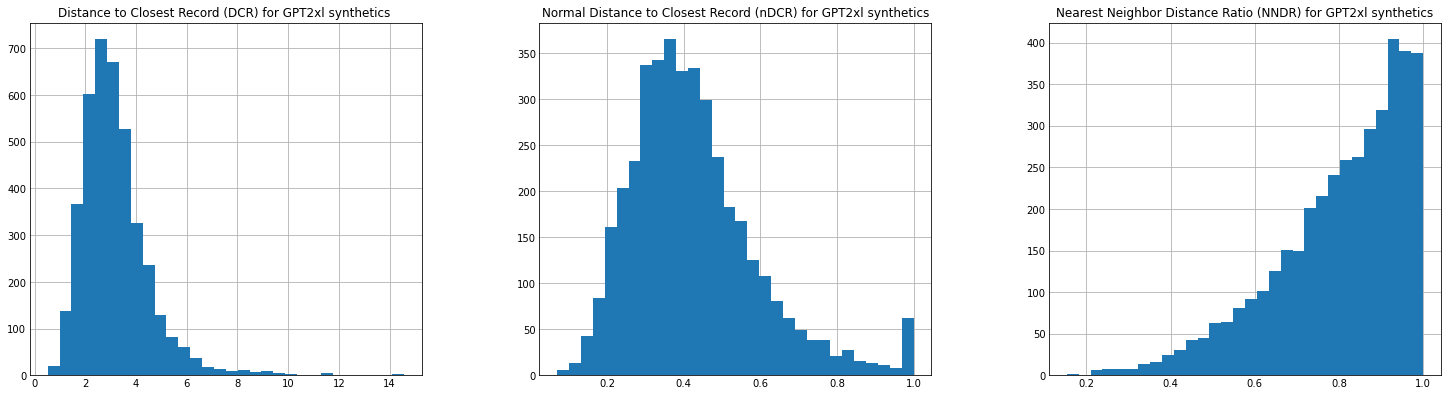

In [79]:
synt_privacy = pd.DataFrame(zip(dcr_synt2,dcr_synt_norm2,nndr_synt2),columns=['Distance to Closest Record (DCR) for GPT2xl synthetics ','Normal Distance to Closest Record (nDCR) for GPT2xl synthetics','Nearest Neighbor Distance Ratio (NNDR) for GPT2xl synthetics'])
synt_privacy.hist(bins=privacy_number_of_bins, grid=True, figsize=(20, 5), layout=(1, 3))

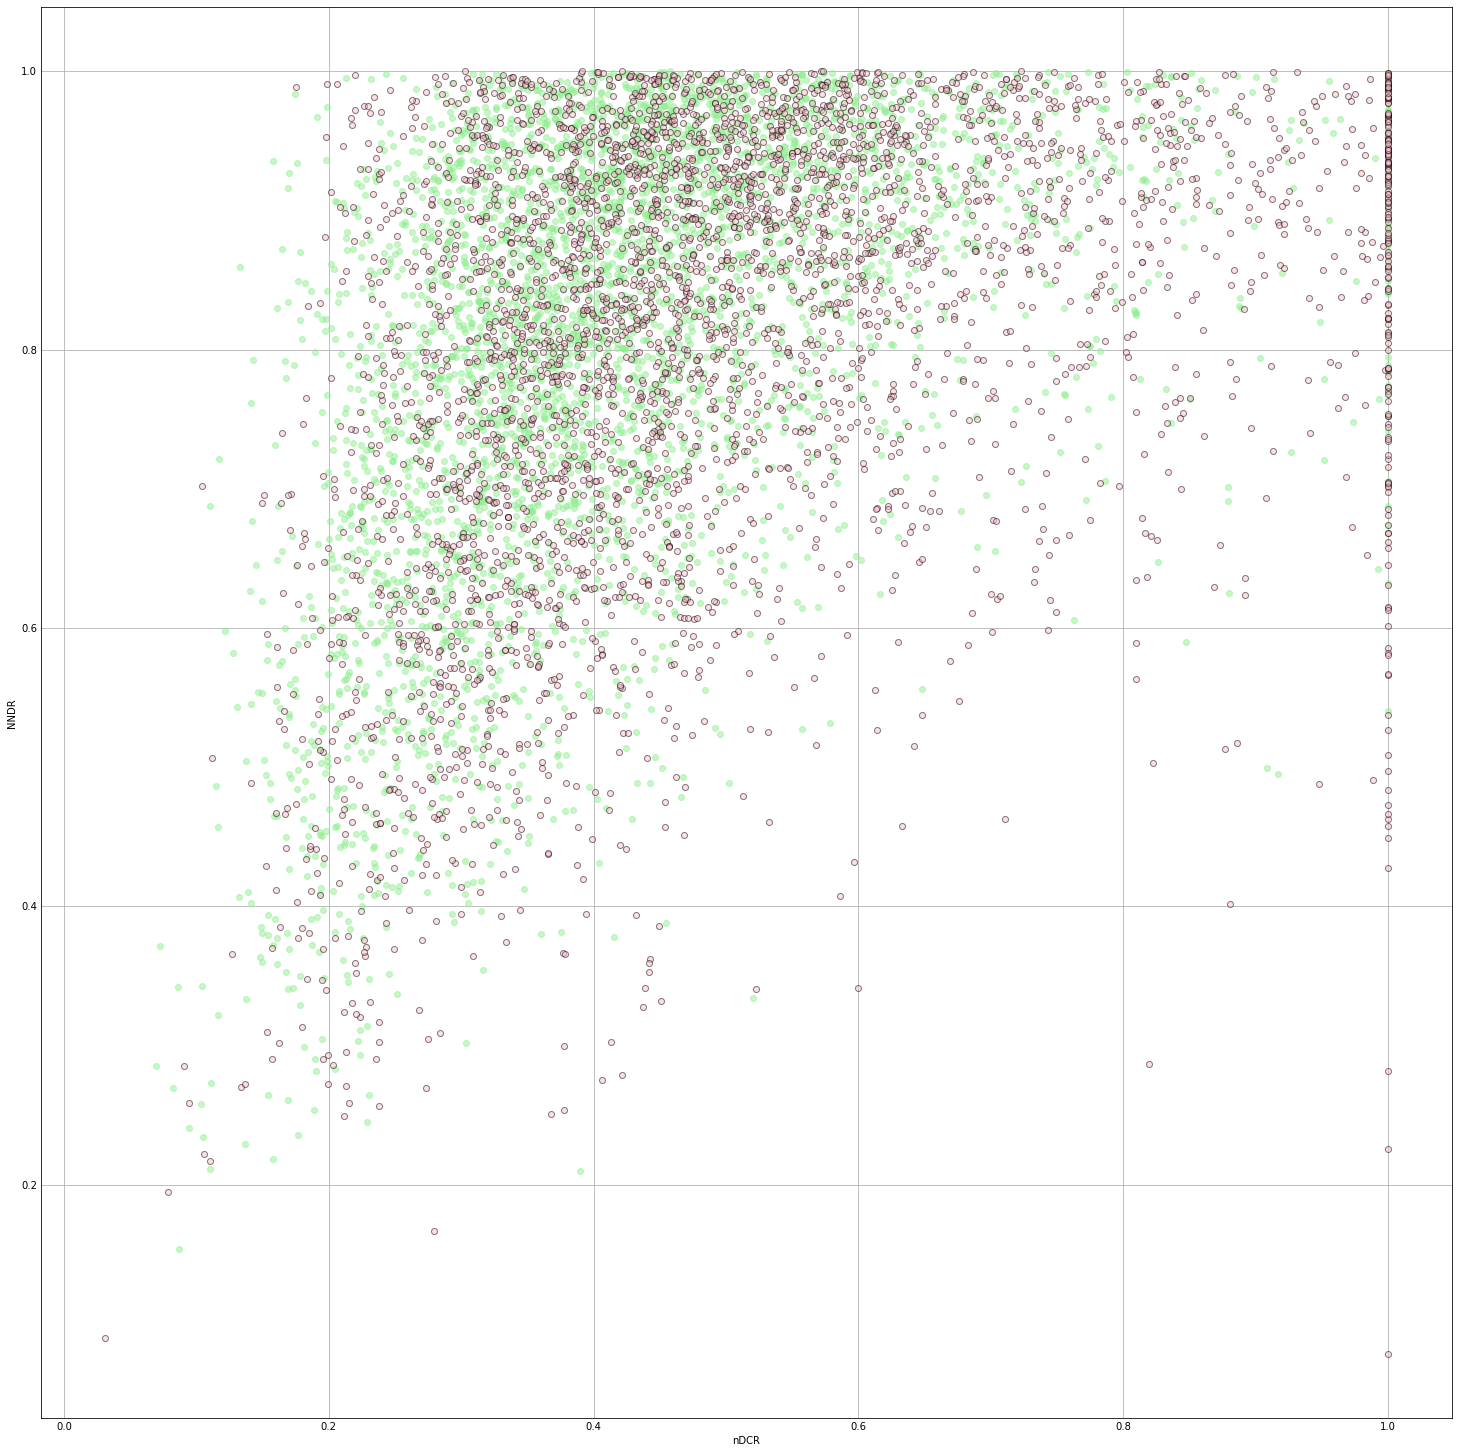

In [80]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlabel("nDCR")
plt.ylabel("NNDR")
ax.scatter(dcr_synt_norm2, nndr_synt2, c='lightgreen', label='GPT2xl', alpha=0.5, edgecolors='lightgreen')
ax.scatter(dcr_real_norm, nndr_real, c='pink', label='Real data', alpha=0.5, edgecolors='black')
plt.show()

In [81]:
calc_dcr_ratio(dcr_real_norm,dcr_synt_norm2)

0.5390534821085032

In [82]:
calc_nndr_ratio(nndr_real,nndr_synt2)

0.9351717464925012

In [83]:
stat, p_value = mannwhitneyu(dcr_real_norm, dcr_synt_norm2)
print(f" Mann-Whitney U rank test for nDCR: statistic={stat:.8f}, p-value={p_value:.8f}")
stat, p_value = mannwhitneyu(nndr_real, nndr_synt2)
print(f" Mann-Whitney U rank test for NNDR: statistic={stat:.6f}, p-value={p_value:.6f}")
print ('')


print ('')
stat, p_value = ks_2samp(dcr_real_norm, dcr_synt_norm2)
print(f" Kolmogorov-Smirnov Test for nDCR: statistic={stat:.8f}, p-value={p_value:.8f}")
stat, p_value = ks_2samp(nndr_real, nndr_synt2)
print(f" Kolmogorov-Smirnov Test for NNDR: statistic={stat:.6f}, p-value={p_value:.6f}")

 Mann-Whitney U rank test for nDCR: statistic=9662987.00000000, p-value=0.00000000
 Mann-Whitney U rank test for NNDR: statistic=8156564.000000, p-value=0.129564


 Kolmogorov-Smirnov Test for nDCR: statistic=0.15600000, p-value=0.00000000
 Kolmogorov-Smirnov Test for NNDR: statistic=0.024750, p-value=0.172443


In [84]:
res_privacy = pd.DataFrame([['GPT2XL', bound2,
                        calc_dcr_ratio(dcr_real_norm,dcr_synt_norm2),
                        calc_nndr_ratio(nndr_real,nndr_synt2),
                        np.median(dcr_synt_norm2),
                        np.median(nndr_synt2),
                        dcr_synt_norm2.min()    ]],
                        columns=['Model','95% bound','DCRn ratio','NNDR ratio','DCRn median', 'NNDR median','Minimal distance'])

privacy_results = pd.concat([privacy_results, res_privacy],axis=0)

## Cerebras privacy

In [85]:
syn_test3 = synt_data_cerebras.sample(n=4000)

In [86]:
syn_test_neightbors3 = nn_model.kneighbors(syn_test3, n_neighbors=2)

In [87]:
print('Stats : mean, std, max, min, amount')
dcr_synt3 = syn_test_neightbors3[0][:, 0]
dcr2_synt3 = syn_test_neightbors3[0][:, 1]
baseline_dcr = dcr_synt3
bound3 = np.quantile(baseline_dcr[~np.isnan(baseline_dcr)], dcr_quantile)
nndr_synt3 = dcr_synt3 / np.maximum(dcr2_synt3, smoothing_factor)    
print('NNDR stats', nndr_synt3.mean(), nndr_synt3.std(), nndr_synt3.max(), nndr_synt3.min(), len (nndr_synt3))
dcr_synt_norm3 = np.where(dcr_synt3 <= bound, dcr_synt3 / bound, 1)
print('nDCR stats', dcr_synt_norm3.mean(), dcr_synt_norm3.std(), dcr_synt_norm3.max(), dcr_synt_norm3.min(), len (dcr_synt_norm3))

Stats : mean, std, max, min, amount
NNDR stats 0.7955004285714138 0.15890609879718348 0.9999575139289606 0.14618673021227394 4000
nDCR stats 0.42386705902933114 0.16717493902273167 1.0 0.059918382879864965 4000


array([[<AxesSubplot:title={'center':'Distance to Closest Record (DCR) for Cerebras synthetics '}>,
        <AxesSubplot:title={'center':'Normal Distance to Closest Record (nDCR) for Cerebras synthetics'}>,
        <AxesSubplot:title={'center':'Nearest Neighbor Distance Ratio (NNDR) for Cerebras synthetics'}>]],
      dtype=object)

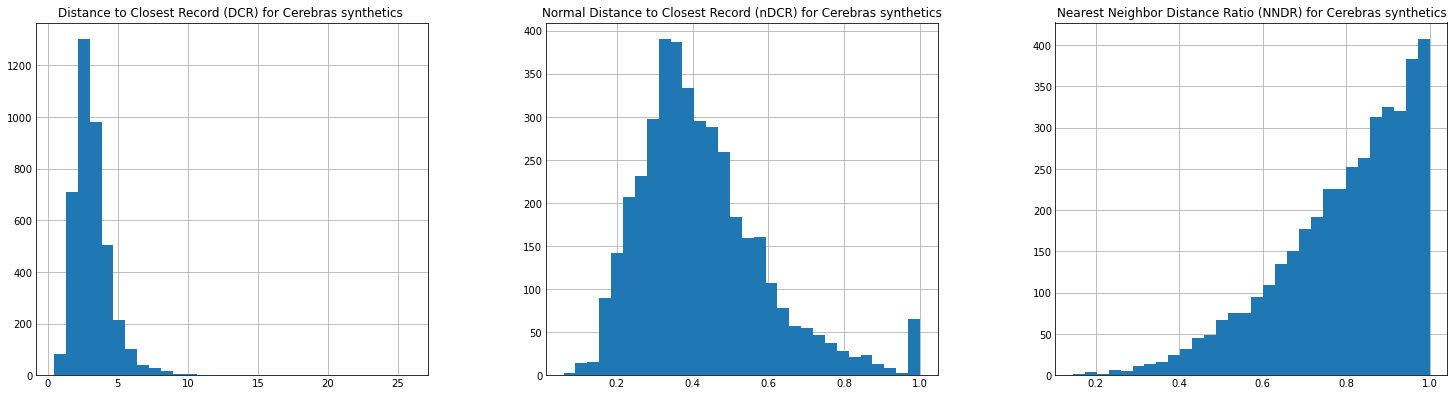

In [88]:
synt_privacy = pd.DataFrame(zip(dcr_synt3,dcr_synt_norm3,nndr_synt3),columns=['Distance to Closest Record (DCR) for Cerebras synthetics ','Normal Distance to Closest Record (nDCR) for Cerebras synthetics','Nearest Neighbor Distance Ratio (NNDR) for Cerebras synthetics'])
synt_privacy.hist(bins=privacy_number_of_bins, grid=True, figsize=(20, 5), layout=(1, 3))

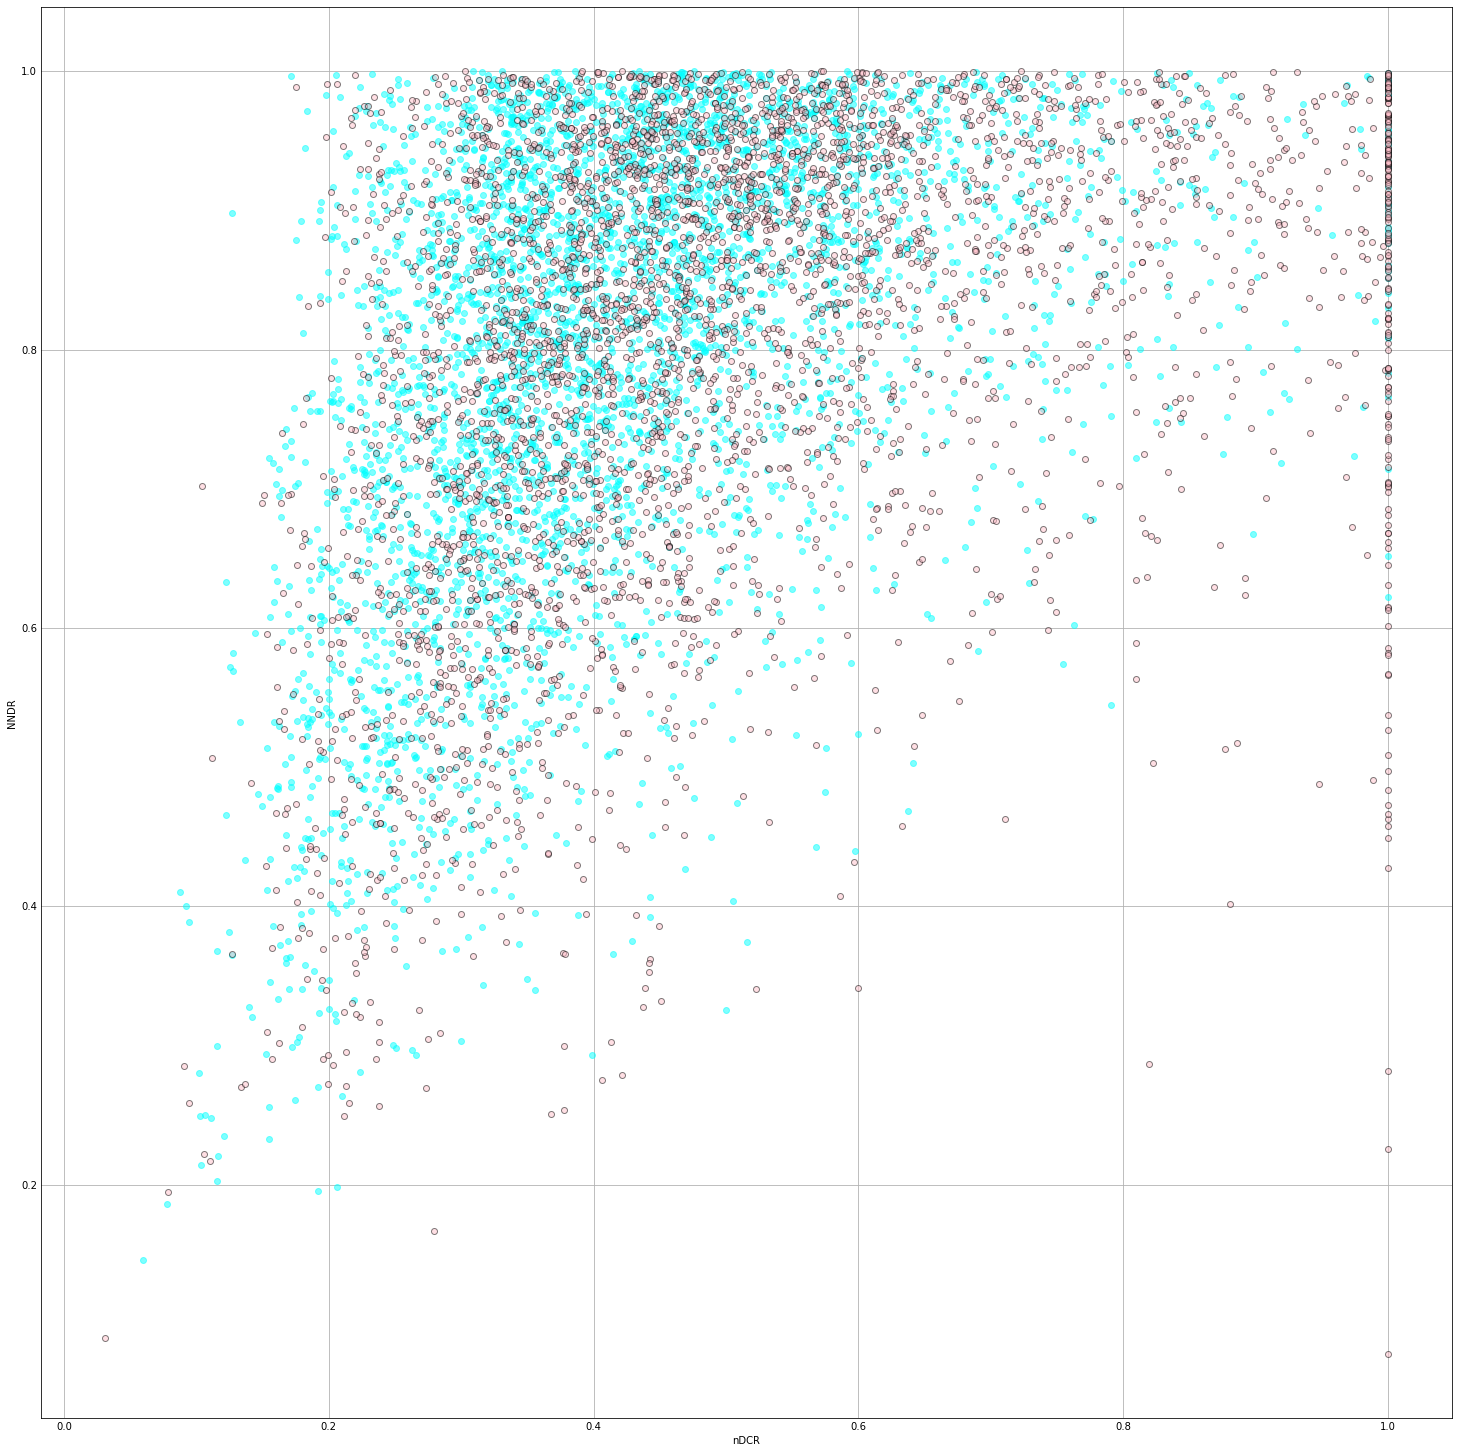

In [89]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlabel("nDCR")
plt.ylabel("NNDR")
ax.scatter(dcr_synt_norm3, nndr_synt3, c='cyan', label='Cerebras', alpha=0.5, edgecolors='cyan')
ax.scatter(dcr_real_norm, nndr_real, c='pink', label='Real', alpha=0.5, edgecolors='black')
plt.show()

In [90]:
calc_dcr_ratio(dcr_real_norm,dcr_synt_norm3)

0.5497869043006587

In [91]:
calc_nndr_ratio(nndr_real,nndr_synt3)

0.8735362997658079

In [92]:
stat, p_value = mannwhitneyu(dcr_real_norm, dcr_synt_norm3)
print(f" Mann-Whitney U rank test for nDCR: statistic={stat:.8f}, p-value={p_value:.8f}")
stat, p_value = mannwhitneyu(nndr_real, nndr_synt3)
print(f" Mann-Whitney U rank test for NNDR: statistic={stat:.6f}, p-value={p_value:.6f}")
print ('')


print ('')
stat, p_value = ks_2samp(dcr_real_norm, dcr_synt_norm3)
print(f" Kolmogorov-Smirnov Test for nDCR: statistic={stat:.8f}, p-value={p_value:.8f}")
stat, p_value = ks_2samp(nndr_real, nndr_synt3)
print(f" Kolmogorov-Smirnov Test for NNDR: statistic={stat:.6f}, p-value={p_value:.6f}")

 Mann-Whitney U rank test for nDCR: statistic=9707620.00000000, p-value=0.00000000
 Mann-Whitney U rank test for NNDR: statistic=8332908.000000, p-value=0.001268


 Kolmogorov-Smirnov Test for nDCR: statistic=0.15300000, p-value=0.00000000
 Kolmogorov-Smirnov Test for NNDR: statistic=0.039500, p-value=0.003893


In [93]:
res_privacy = pd.DataFrame([['Cerebras', bound3,
                        calc_dcr_ratio(dcr_real_norm,dcr_synt_norm3),
                        calc_nndr_ratio(nndr_real,nndr_synt3),
                        np.median(dcr_synt_norm3),
                        np.median(nndr_synt3),
                        dcr_synt_norm3.min()    ]],
                        columns=['Model','95% bound','DCRn ratio','NNDR ratio','DCRn median', 'NNDR median','Minimal distance'])

privacy_results = pd.concat([privacy_results, res_privacy],axis=0)

## Phi-1.5 privacy

In [94]:
syn_test4 = synt_data_phi.sample(n=4000)

In [95]:
syn_test_neightbors4 = nn_model.kneighbors(syn_test4, n_neighbors=2)

In [96]:
print('Stats : mean, std, max, min, amount')
dcr_synt4 = syn_test_neightbors4[0][:, 0]
dcr2_synt4 = syn_test_neightbors4[0][:, 1]
nndr_synt4 = dcr_synt4 / np.maximum(dcr2_synt4, smoothing_factor)   
baseline_dcr = dcr_synt4
bound4 = np.quantile(baseline_dcr[~np.isnan(baseline_dcr)], dcr_quantile)
print('NNDR stats', nndr_synt4.mean(), nndr_synt4.std(), nndr_synt4.max(), nndr_synt4.min(), len (nndr_synt4))
dcr_synt_norm4 = np.where(dcr_synt4 <= bound, dcr_synt4 / bound, 1)
print('nDCR stats', dcr_synt_norm4.mean(), dcr_synt_norm4.std(), dcr_synt_norm4.max(), dcr_synt_norm4.min(), len (dcr_synt_norm4))

Stats : mean, std, max, min, amount
NNDR stats 0.8014585968930766 0.1576155622628631 0.999977717948091 0.1213292484875732 4000
nDCR stats 0.42695805504282647 0.17132024031214776 1.0 0.04934839387983607 4000


array([[<AxesSubplot:title={'center':'Distance to Closest Record (DCR) for Phi synthetics '}>,
        <AxesSubplot:title={'center':'Normal Distance to Closest Record (nDCR) for Phi synthetics'}>,
        <AxesSubplot:title={'center':'Nearest Neighbor Distance Ratio (NNDR) for Phi synthetics'}>]],
      dtype=object)

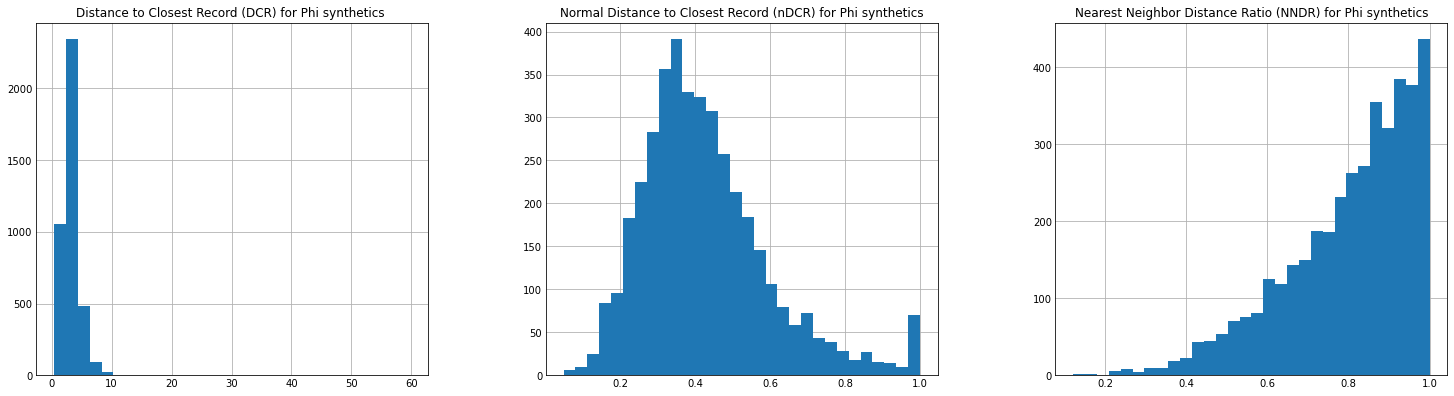

In [97]:
synt_privacy = pd.DataFrame(zip(dcr_synt4,dcr_synt_norm4,nndr_synt4),columns=['Distance to Closest Record (DCR) for Phi synthetics ','Normal Distance to Closest Record (nDCR) for Phi synthetics','Nearest Neighbor Distance Ratio (NNDR) for Phi synthetics'])
synt_privacy.hist(bins=privacy_number_of_bins, grid=True, figsize=(20, 5), layout=(1, 3))

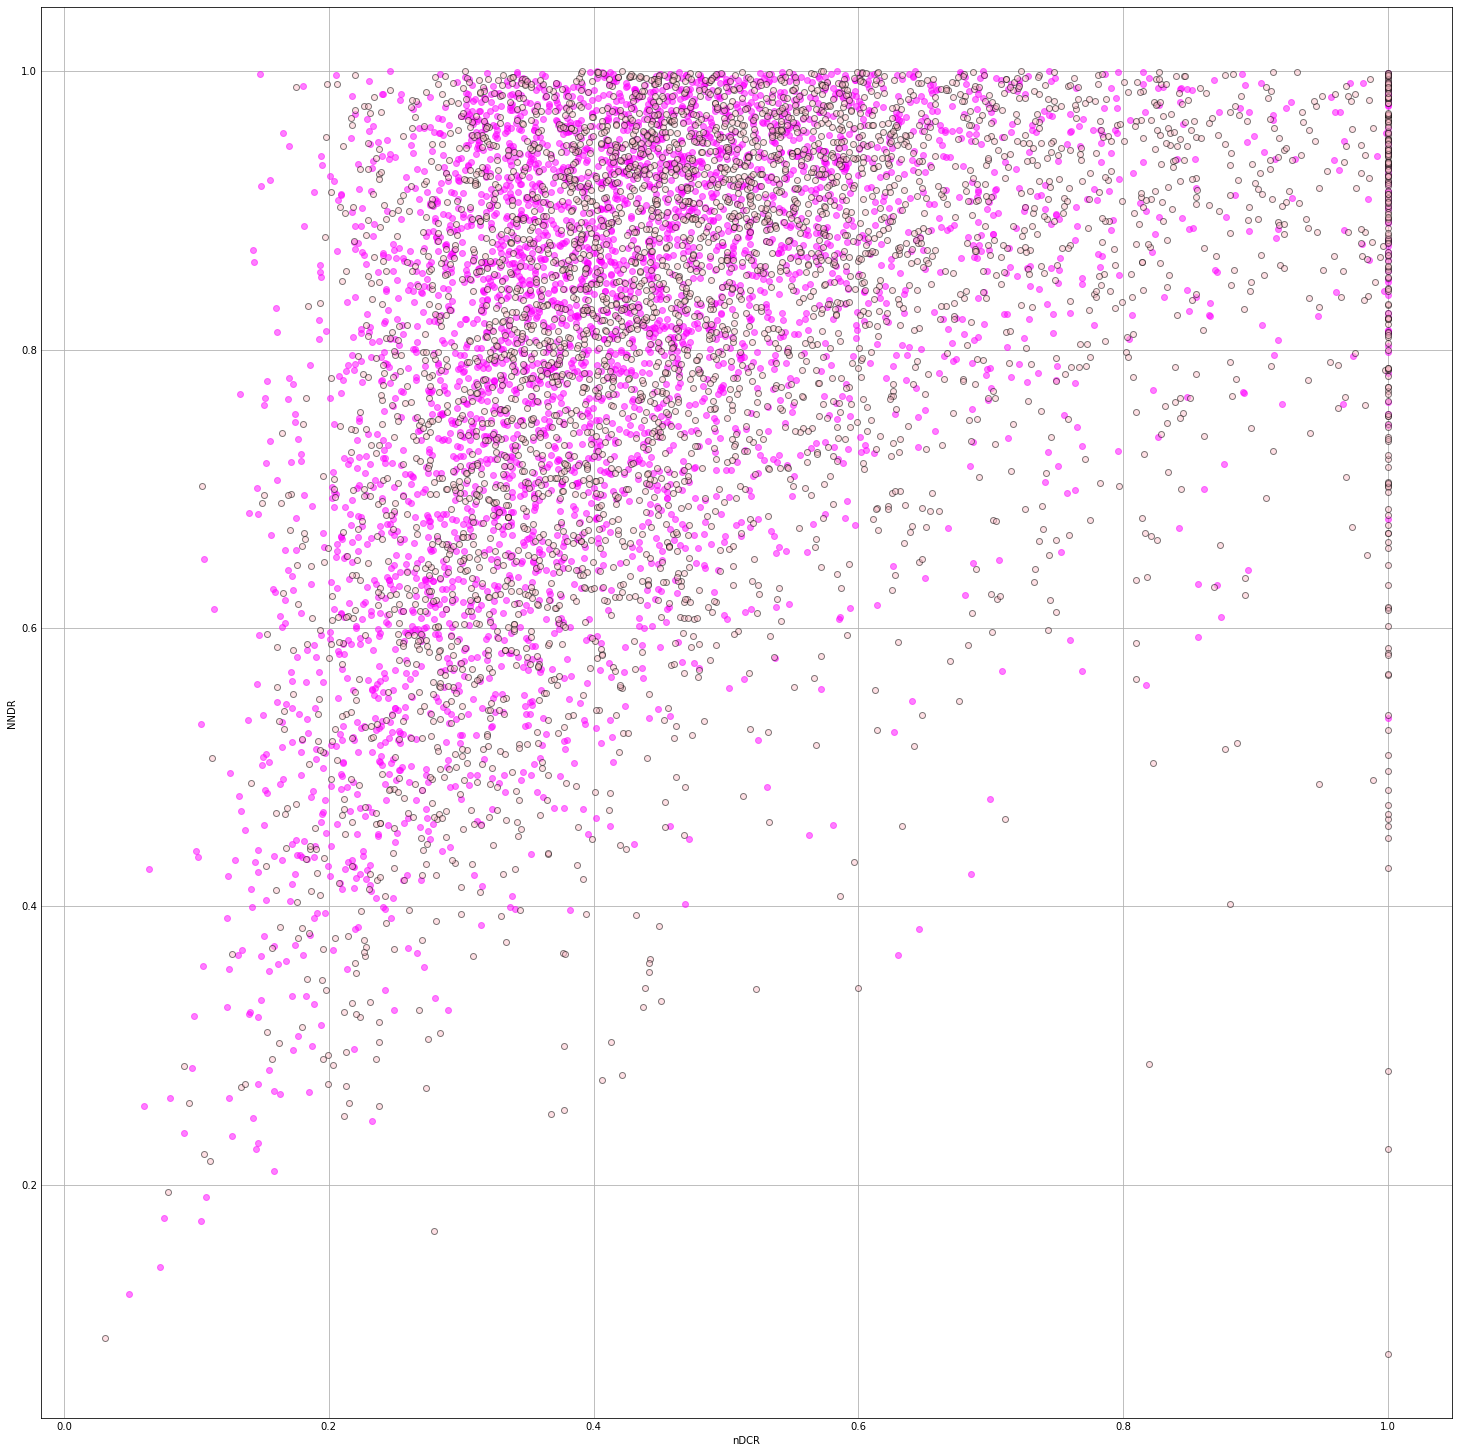

In [98]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlabel("nDCR")
plt.ylabel("NNDR")
ax.scatter(dcr_synt_norm4, nndr_synt4, c='magenta', label='Phi-1.5', alpha=0.5, edgecolors='magenta')
ax.scatter(dcr_real_norm, nndr_real, c='pink', label='Real', alpha=0.5, edgecolors='black')
plt.show()

In [99]:
calc_dcr_ratio(dcr_real_norm,dcr_synt_norm4)

0.5631105900742478

In [100]:
calc_nndr_ratio(nndr_real,nndr_synt4)

0.9579050416054822

In [101]:
stat, p_value = mannwhitneyu(dcr_real_norm, dcr_synt_norm4)
print(f" Mann-Whitney U rank test for nDCR: statistic={stat:.8f}, p-value={p_value:.8f}")
stat, p_value = mannwhitneyu(nndr_real, nndr_synt4)
print(f" Mann-Whitney U rank test for NNDR: statistic={stat:.6f}, p-value={p_value:.6f}")
print ('')


print ('')
stat, p_value = ks_2samp(dcr_real_norm, dcr_synt_norm4)
print(f" Kolmogorov-Smirnov Test for nDCR: statistic={stat:.8f}, p-value={p_value:.8f}")
stat, p_value = ks_2samp(nndr_real, nndr_synt4)
print(f" Kolmogorov-Smirnov Test for NNDR: statistic={stat:.6f}, p-value={p_value:.6f}")

 Mann-Whitney U rank test for nDCR: statistic=9626762.00000000, p-value=0.00000000
 Mann-Whitney U rank test for NNDR: statistic=8150818.000000, p-value=0.144237


 Kolmogorov-Smirnov Test for nDCR: statistic=0.14550000, p-value=0.00000000
 Kolmogorov-Smirnov Test for NNDR: statistic=0.028750, p-value=0.073300


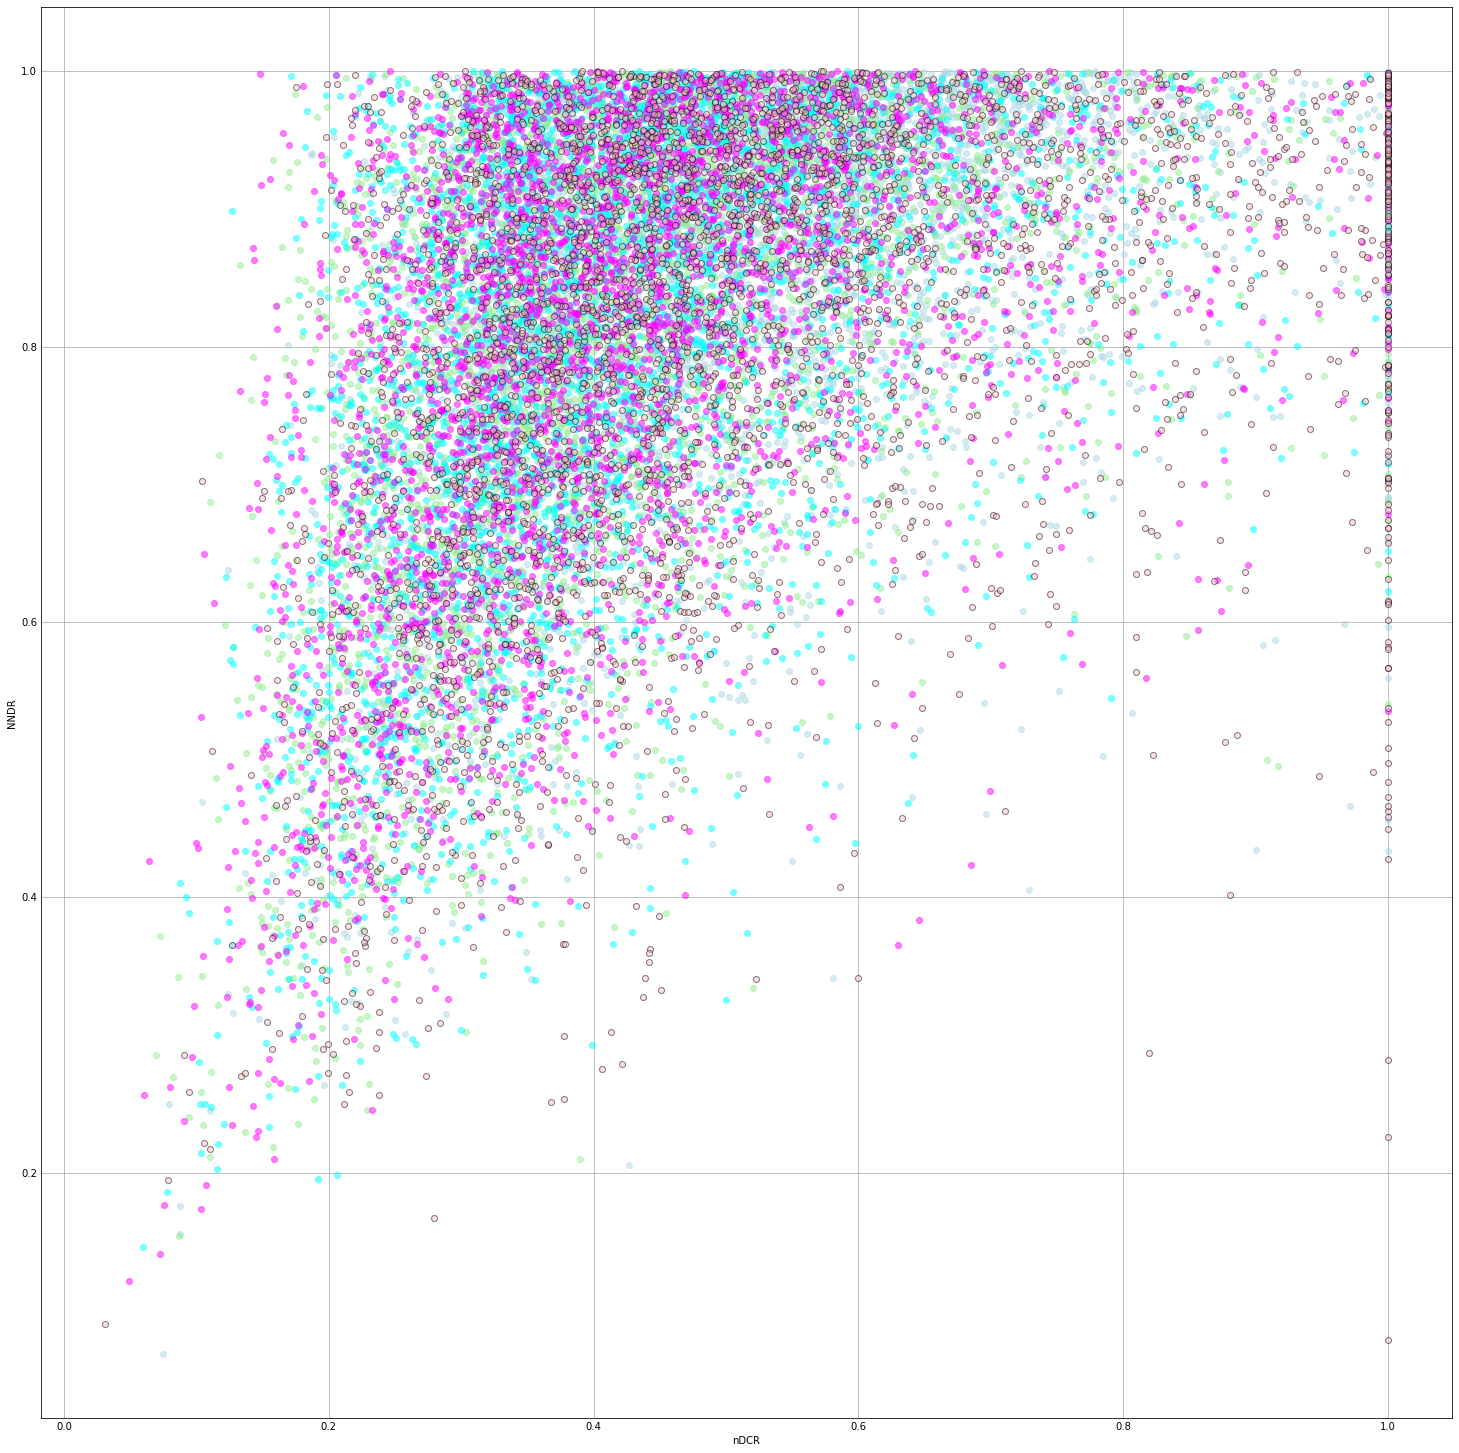

In [102]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlabel("nDCR")
plt.ylabel("NNDR")
ax.scatter(dcr_synt_norm1, nndr_synt1, c='lightblue', label='DistilledGPT', alpha=0.5, edgecolors='lightblue')
ax.scatter(dcr_synt_norm2, nndr_synt2, c='lightgreen', label='GPT2xl', alpha=0.5, edgecolors='lightgreen')
ax.scatter(dcr_synt_norm3, nndr_synt3, c='cyan', label='Cerebras', alpha=0.5, edgecolors='cyan')
ax.scatter(dcr_synt_norm4, nndr_synt4, c='magenta', label='Phi-1.5', alpha=0.5, edgecolors='magenta')
ax.scatter(dcr_real_norm, nndr_real, c='pink', label='Real', alpha=0.5, edgecolors='black')
plt.show()

In [103]:
res_privacy = pd.DataFrame([['Phi1.5', bound4,
                        calc_dcr_ratio(dcr_real_norm,dcr_synt_norm4),
                        calc_nndr_ratio(nndr_real,nndr_synt4),
                        np.median(dcr_synt_norm4),
                        np.median(nndr_synt4),
                        dcr_synt_norm4.min()    ]],
                        columns=['Model','95% bound','DCRn ratio','NNDR ratio','DCRn median', 'NNDR median','Minimal distance'])

privacy_results = pd.concat([privacy_results, res_privacy],axis=0)

In [104]:
privacy_results

Model  95% bound  DCRn ratio  NNDR ratio  DCRn median  NNDR median  \
0   Real dataset   7.432463    1.000000    1.000000     0.455280     0.844917   
0  Distilled GPT   6.366050    1.539683    1.512563     0.505222     0.885093   
0         GPT2XL   5.564843    0.539053    0.935172     0.398605     0.836883   
0       Cerebras   5.560233    0.549787    0.873536     0.392769     0.830599   
0         Phi1.5   5.648004    0.563111    0.957905     0.399151     0.841315   

   Minimal distance  
0          0.030743  
0          0.075039  
0          0.069668  
0          0.059918  
0          0.049348

In [105]:
privacy_results.to_csv('privacy_results_shorthouses_temp0.7.csv')